# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

##### Data Dictionary Reference
| Column | Definition |
| ------ | ---------- |
| brand_name | Name of manufacturing brand |
| os | OS on which the device runs |
| screen_size | Size of the screen in cm |
| 4g | Whether 4G is available or not |
| 5g | Whether 5G is available or not |
| main_camera_mp | Resolution of the rear camera in megapixels |
| selfie_camera_mp | Resolution of the front camera in megapixels |
| int_memory | Amount of internal memory (ROM) in GB |
| ram | Amount of RAM in GB |
| battery | Energy capacity of the device battery in mAh |
| weight | Weight of the device in grams |
| release_year | Year when the device model was released |
| days_used | Number of days the used/refurbished device has been used |
| normalized_new_price | Normalized price of a new device of the same model in euros |
| normalized_used_price | Normalized price of the used/refurbished device in euros |

## Importing necessary libraries

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for statistical analysis
import pylab
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Display float numbers with three digits to the right of the decimal point.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Mounted at /content/drive


## Loading the dataset

In [ ]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# View top five rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,4.308,4.715
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,5.162,5.519
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,5.111,5.885
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,5.135,5.631
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,4.390,4.948


In [ ]:
# Data shape
print("There are ", df.shape[0], " rows and ",
      df.shape[1] ," columns in the dataset.", sep = "")

There are 3454 rows and 15 columns in the dataset.


In [ ]:
# View data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Observations: Of the 15 variables, four are object, two are integer, and nine are float.

In [ ]:
# Statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.000,13.713,3.805,5.080,12.700,12.830,15.340,30.710
main_camera_mp,3275.000,9.460,4.815,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3452.000,6.554,6.970,0.000,2.000,5.000,8.000,32.000
int_memory,3450.000,54.573,84.972,0.010,16.000,32.000,64.000,1024.000
ram,3450.000,4.036,1.365,0.020,4.000,4.000,4.000,12.000
battery,3448.000,3133.403,1299.683,500.000,2100.000,3000.000,4000.000,9720.000
weight,3447.000,182.752,88.413,69.000,142.000,160.000,185.000,855.000
release_year,3454.000,2015.965,2.298,2013.000,2014.000,2015.500,2018.000,2020.000
days_used,3454.000,674.870,248.580,91.000,533.500,690.500,868.750,1094.000
normalized_used_price,3454.000,4.365,0.589,1.537,4.034,4.405,4.756,6.619


* Observations:
  * Used device prices range from 1.537 to 6.619 (median = 4.405).
  * New device prices range from 2.901 to 7.848 (median = 5.246).

In [ ]:
# Check for duplicated data
print("There are ", df.duplicated().sum(),
      " duplicated rows in the dataset.",sep = ""
      )

There are 0 duplicated rows in the dataset.


In [ ]:
# check for missing data
print("There are ", df.isnull().sum().sum(),
      " missing values in the dataset:",sep = ""
      )

df.isnull().sum()

# six continuous variables with missing data.

There are 202 missing values in the dataset:


,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

------------------------------------------------------------------------------------------------------
                                              brand_name                                              
------------------------------------------------------------------------------------------------------


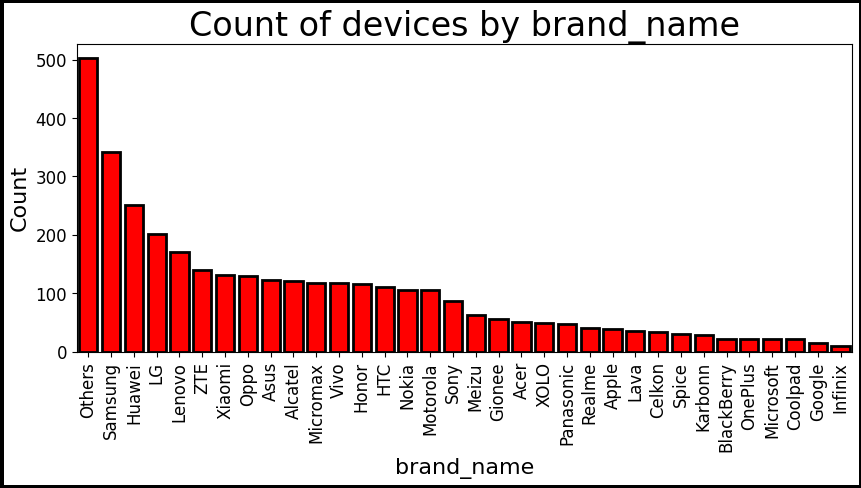

------------------------------------------------------------------------------------------------------
                                                  os                                                  
------------------------------------------------------------------------------------------------------


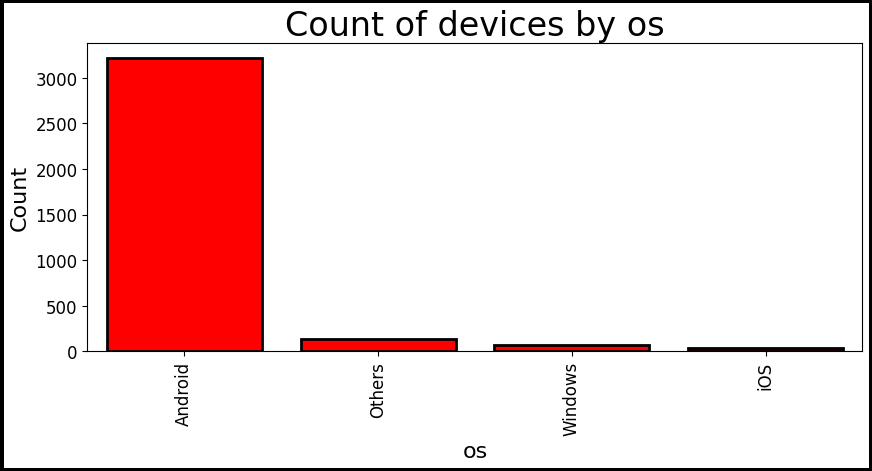

------------------------------------------------------------------------------------------------------
                                                  4g                                                  
------------------------------------------------------------------------------------------------------


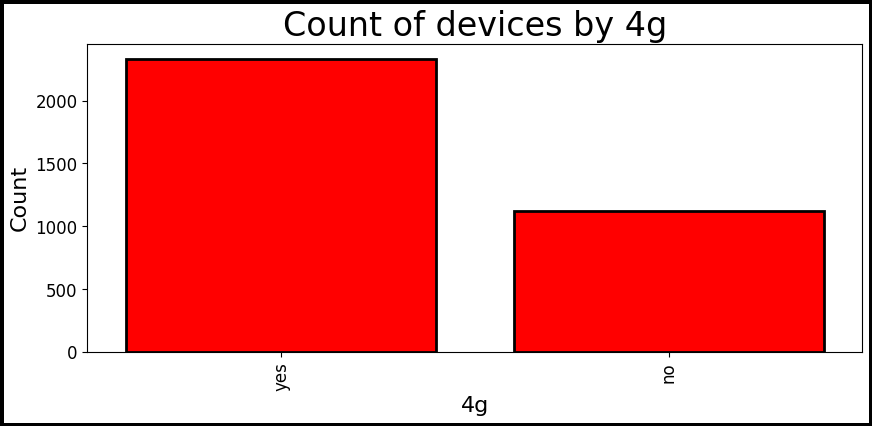

------------------------------------------------------------------------------------------------------
                                                  5g                                                  
------------------------------------------------------------------------------------------------------


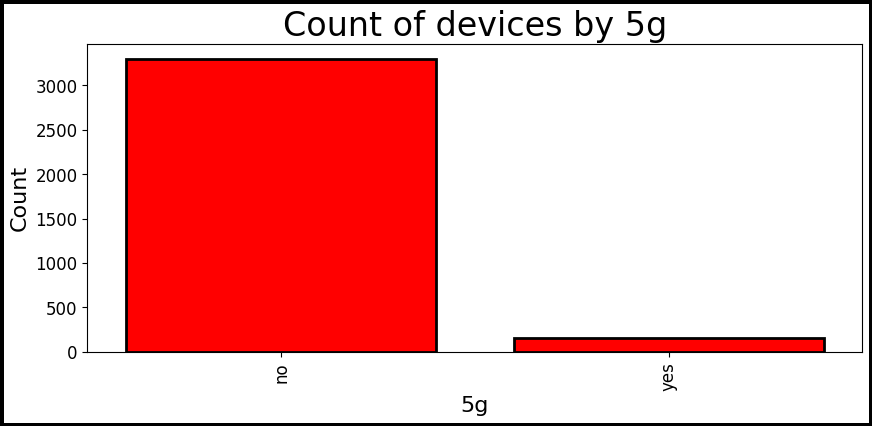

In [ ]:
# Countplots for all categorical variables
df_cat = df[['brand_name', 'os','4g','5g']]

for i in df_cat:
  # Create figure template
  plt.figure(figsize=(10, 4),
             edgecolor = 'black',
             linewidth = 5
             )

  # Separating text
  print("-" * 102)
  txt = i
  print(txt.center(102))
  print("-" * 102)

  # Make countplot
  sns.countplot(data = df_cat,
                x = i,
                order=df[i].value_counts().index,
                edgecolor = 'black',
                linewidth = 2,
                facecolor = 'red'
                )

  # Figure details
  plt.xlabel(i,fontsize = 16)
  plt.ylabel('Count', fontsize = 16)
  plt.xticks(rotation=90, fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.title('Count of devices by ' + i, fontsize = 24)

  # Show figure
  plt.show()

* Observations:
  * The used device market is dominated by Samsung, Hauwei, and Lenovo
    devices. However, devices in the "Others" category lead all others.
  * The sample is mostly made up of devices with the Android operating system.
  * The majority of devices have 4g.
  * Very few devices have 5g.

In [ ]:
# Mean normalized used price for every OS.
df.groupby(['os'])['normalized_used_price'].mean()

,normalized_used_price
os,
Android,4.408
Others,3.307
Windows,4.155
iOS,4.957


---------------------------------------------------------------------------------------------------------------------------------------------
                                                                 screen_size                                                                 
---------------------------------------------------------------------------------------------------------------------------------------------


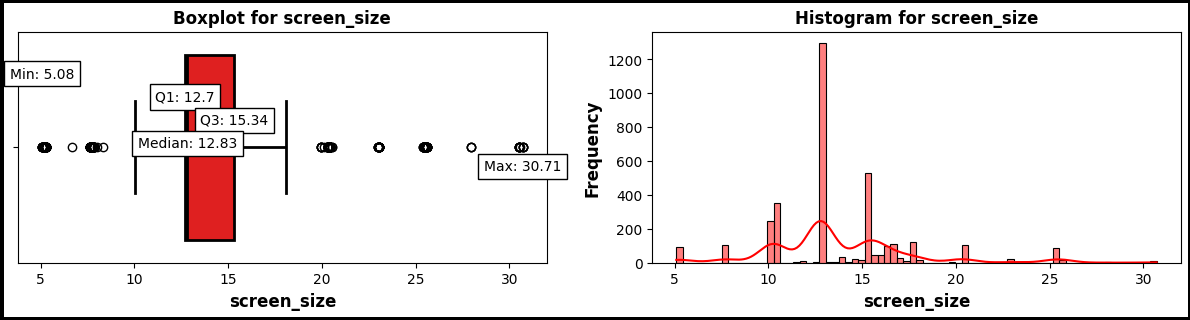

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                main_camera_mp                                                               
---------------------------------------------------------------------------------------------------------------------------------------------


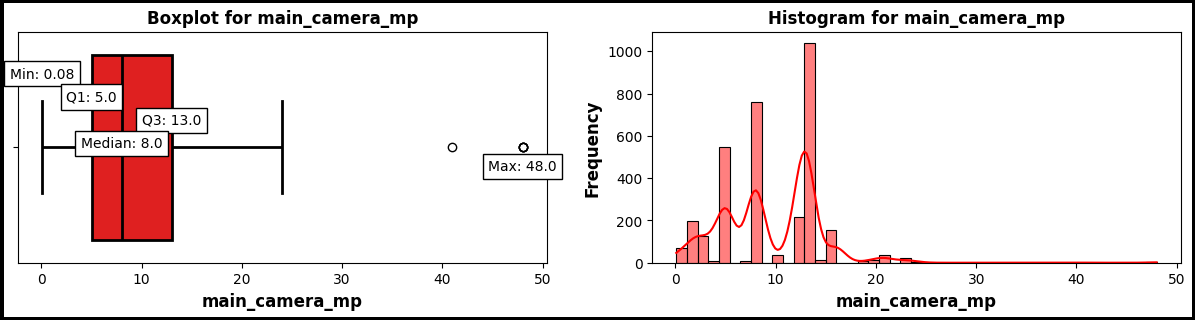

---------------------------------------------------------------------------------------------------------------------------------------------
                                                               selfie_camera_mp                                                              
---------------------------------------------------------------------------------------------------------------------------------------------


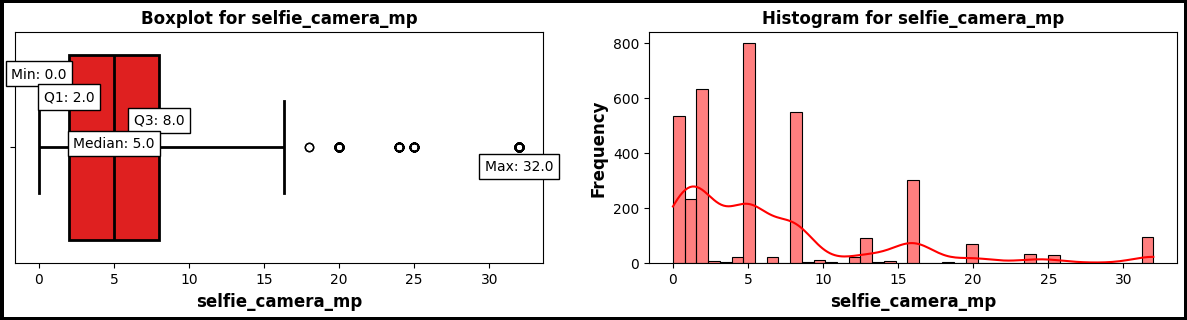

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                  int_memory                                                                 
---------------------------------------------------------------------------------------------------------------------------------------------


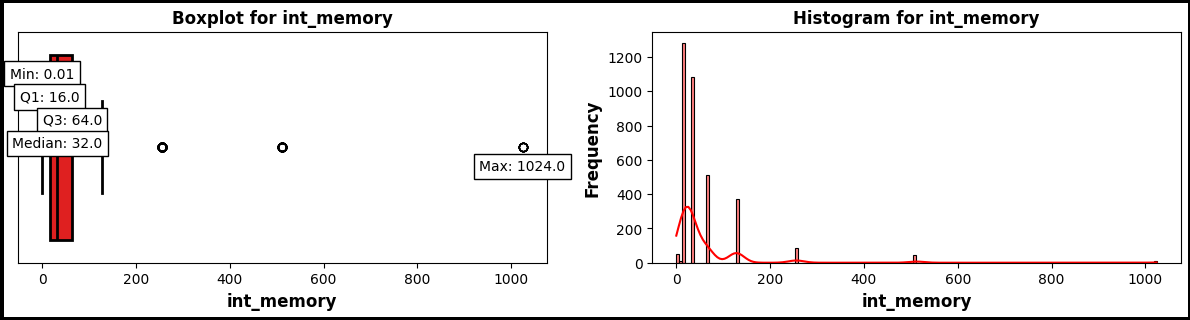

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                     ram                                                                     
---------------------------------------------------------------------------------------------------------------------------------------------


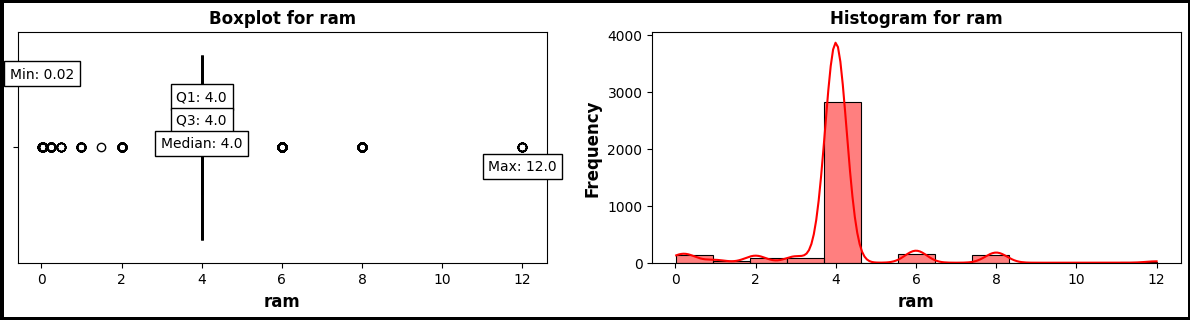

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                   battery                                                                   
---------------------------------------------------------------------------------------------------------------------------------------------


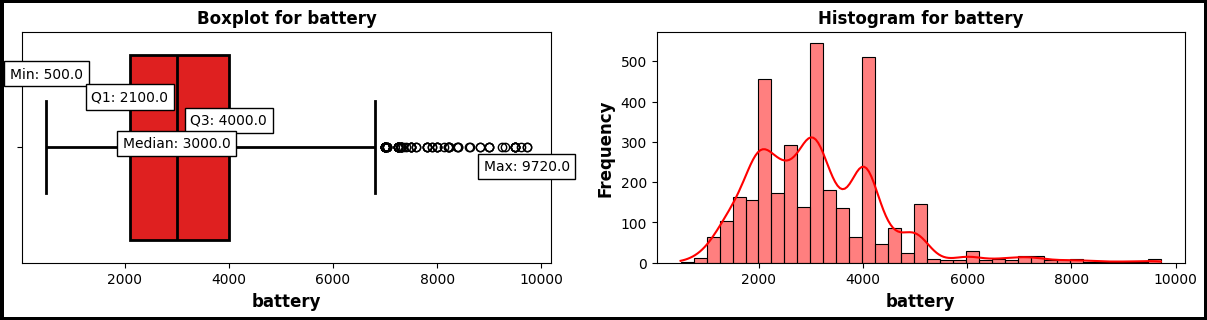

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                    weight                                                                   
---------------------------------------------------------------------------------------------------------------------------------------------


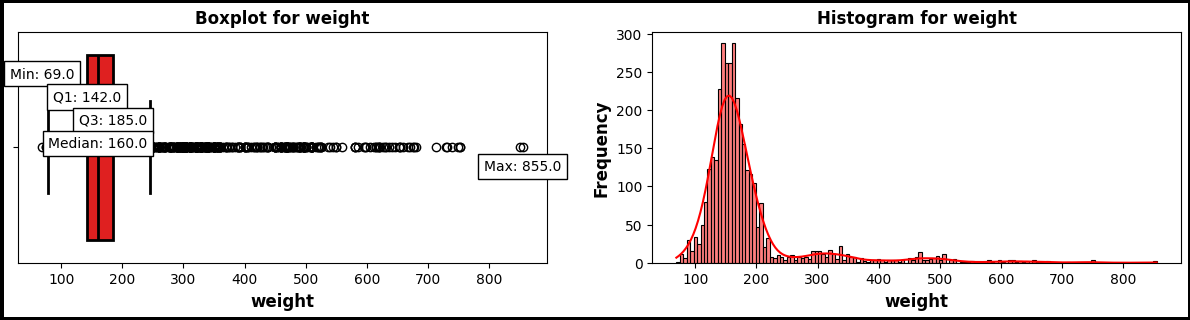

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                 release_year                                                                
---------------------------------------------------------------------------------------------------------------------------------------------


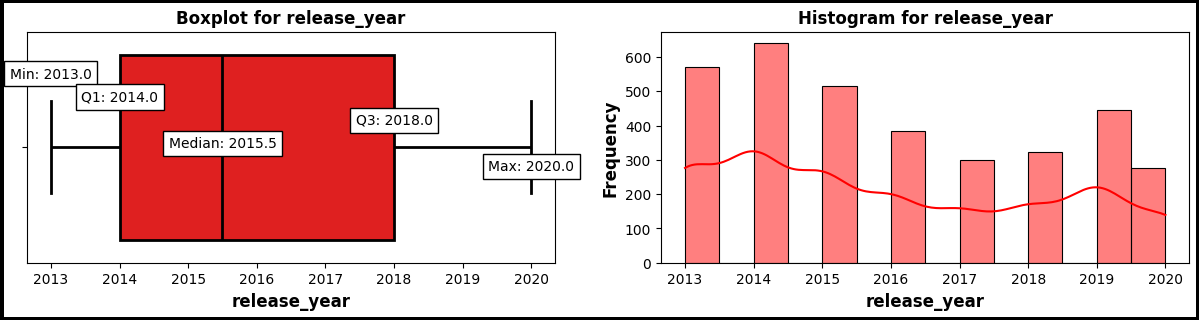

---------------------------------------------------------------------------------------------------------------------------------------------
                                                                  days_used                                                                  
---------------------------------------------------------------------------------------------------------------------------------------------


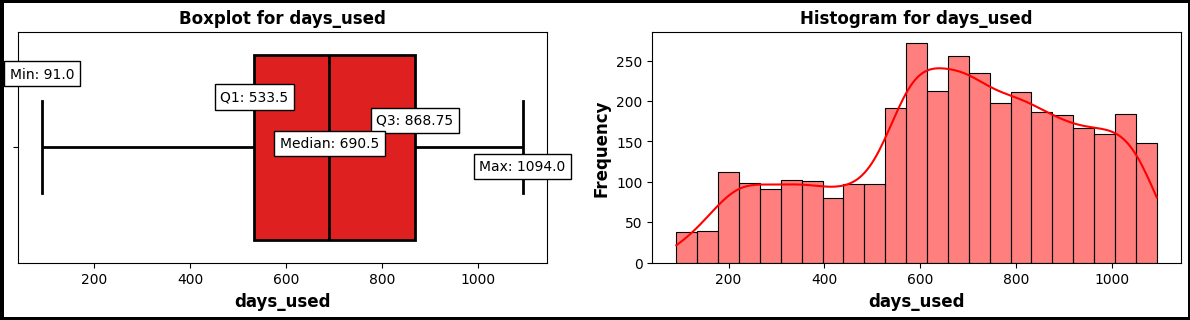

---------------------------------------------------------------------------------------------------------------------------------------------
                                                            normalized_used_price                                                            
---------------------------------------------------------------------------------------------------------------------------------------------


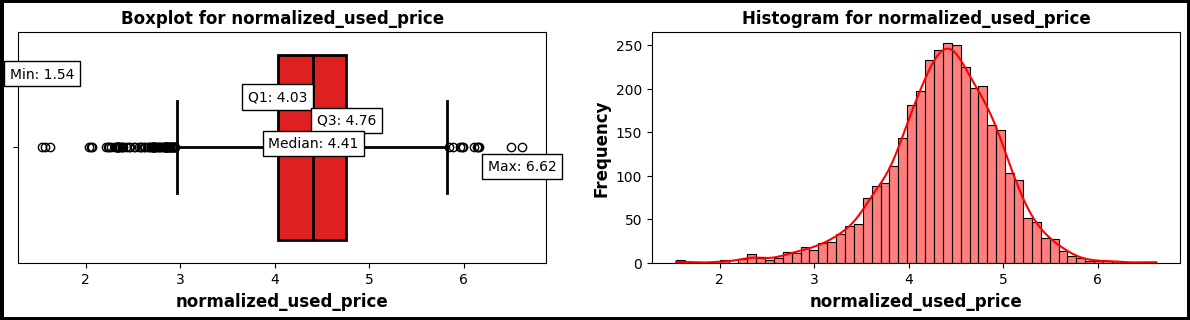

---------------------------------------------------------------------------------------------------------------------------------------------
                                                             normalized_new_price                                                            
---------------------------------------------------------------------------------------------------------------------------------------------


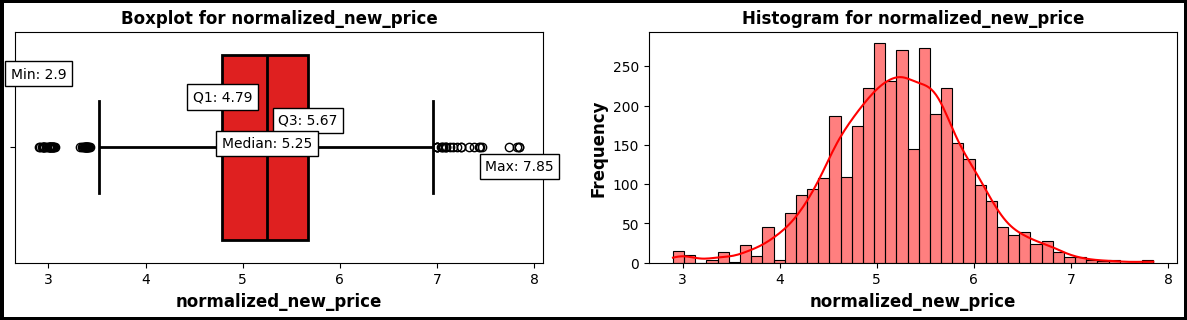

In [ ]:
# boxplot and histograms for all continuous variables

# Make a dataframe for only continuous variables
df_cont = df.drop(['brand_name', 'os','4g','5g'], axis=1)

# Get the names of continuous variables
cols = df_cont.columns

for numb, i in enumerate(df_cont):

  # Separating text
  print("-" * 141)
  txt = i
  print(txt.center(141))
  print("-" * 141)

  # Figure template
  plt.figure(figsize=(15, 3),
             edgecolor = 'black',
             linewidth = 5
             )

  # --- Create boxplot ---
  plt.subplot(1, 2, 1)
  box_plot = sns.boxplot(x=df_cont[i],
                         color=[1,0,0],
                         linewidth = 2,
                         linecolor='black',
                         legend=False
                         )
  # Figure Details
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.title('Boxplot for ' + i, fontsize=12, fontweight='bold')

  # Calculate quartiles and median
  Min = round(df_cont[i].quantile(0),2)
  Q1 = round(df_cont[i].quantile(0.25),2)
  Q3 = round(df_cont[i].quantile(0.75),2)
  Max = round(df_cont[i].quantile(1),2)
  median = round(df_cont[i].median(),2)

  # Put in 5 number summary labels.

  plt.text(x=Min, y=-0.3, s=f'Min: {Min}', color='black',
           ha='center', bbox=dict(facecolor='white',
                                  alpha=1,edgecolor = 'black')) # Min

  plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='black',
           ha='center', bbox=dict(facecolor='white',
                                  alpha=1,edgecolor = 'black')) # Q1

  plt.text(x=Q3, y=-0.1, s=f'Q3: {Q3}', color='black',
           ha='center', bbox=dict(facecolor='white',
                                  alpha=1,edgecolor = 'black')) # Median

  plt.text(x=median, y=0.0, s=f'Median: {median}', color='black',
           ha='center', bbox=dict(facecolor='white',
                                  alpha=1,edgecolor = 'black')) # Q3

  plt.text(x=Max, y=0.1, s=f'Max: {Max}', color='black',
           ha='center', bbox=dict(facecolor='white',
                                  alpha=1,edgecolor = 'black')) # Max

  # --- Create histogram ---
  plt.subplot(1, 2, 2)
  sns.histplot(df_cont[i],
               color=[1,0,0],
               edgecolor = 'black',
               linewidth =
               0.8,
               kde=True
               )

  # Figure Details
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.title('Histogram for ' + i, fontsize=12, fontweight='bold')
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.ylabel('Frequency', fontsize=12, fontweight='bold')

  # Show plot
  plt.show()

* Observations:
  * **Screen sizes** have wide variation across devices, but the
    most common size is ~13 cm.
  * Besides a few outliers, **main camera MP** mainly ranges from
    0 to 30, with the most common around ~13 MP.
  * Besides a few outliers, **selfie camera MP** mainly ranges from
    0 to 15, with the most common around ~5 MP.
  * A few devices have much more **internal memory** than the
    others. The remaining devices range from 0-200 GB
    (e.g., 4, 8, 32, 64, 128). Some devices have less than 1 GB.
  * Almost all devices have **RAM** between 3 and 4. All others are
    considered outliers.
  * **Battery** sizes vary considerably, with the middle 50% ranging from
    2100-4000 mAh. However, there are several devices that go
    well past 6500 mAh.   
  * The **weight** of devices is right-skewed with a median of 160 and a
    max of 855 grams.
  * The most common **release year** is 2014, but from 2013-2020 the
    distribution is fairly uniform.
  * The distribution for **days used** is also fairly uniform, with a
    median of 690.5 days and a range of 91-1094 days.
  * **Normalized used price** appears to follow a normal distribution,
    but there are plenty of outliers below and above the median. The
    median used price is around 4.41, but many devices go for less than
    3.
  * **Normalized new price** also appears to follow a normal
    distribution, but with several of outliers below and above the median.
    The median used price is around 5.25 but many devices go for less
    than 3.5.

### Bivariate analysis

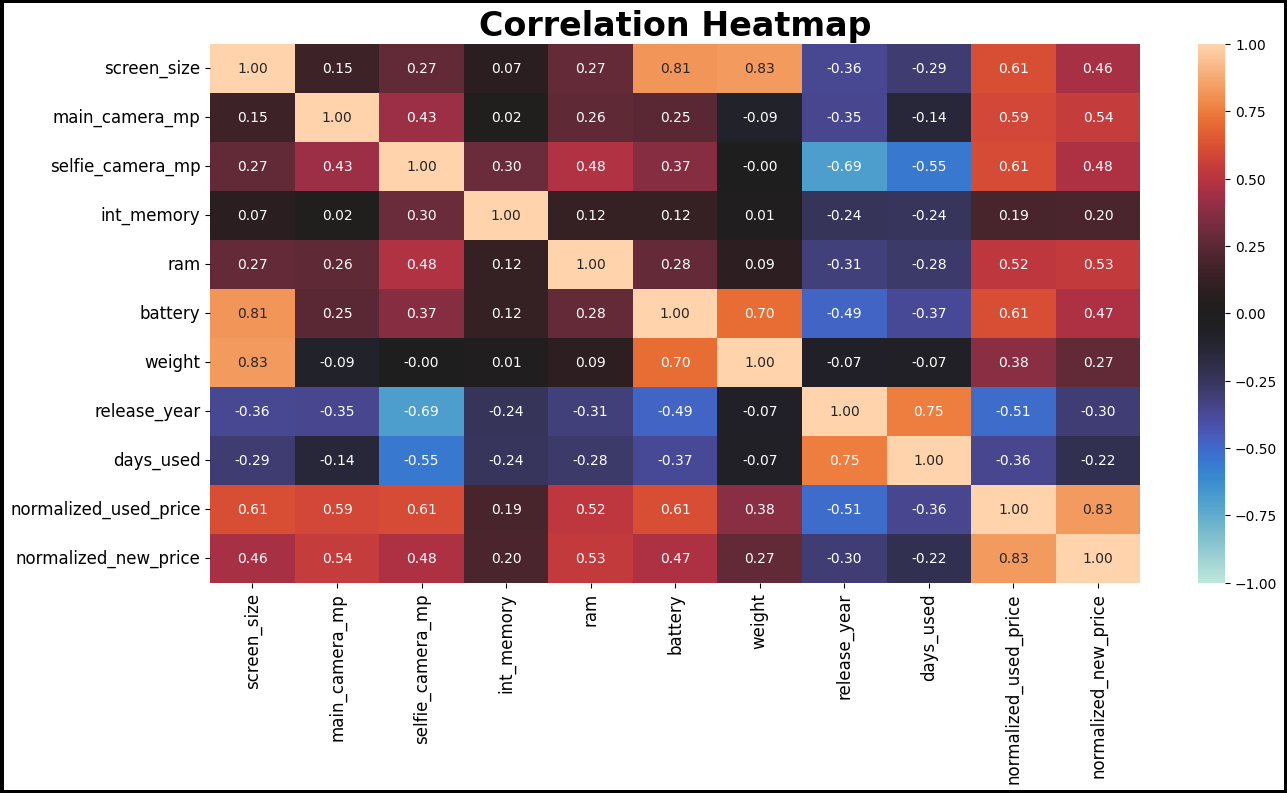

In [ ]:
# Plot heatmap of continuous variables

# Drop release year and replace it with years from 2020
years = 2021 - df['release_year']
df_cont['release_year'] = years


# Figure template
plt.figure(figsize=(15, 7),
           edgecolor = 'black',
           linewidth = 5
           )

sns.heatmap(df_cont.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            cmap="icefire"
            )

# Details
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap',
          fontsize=24,
          fontweight='bold'
          )

# Show plot
plt.show()

* Observations:
  * The strongest positive correlations with normalized used price
    are **normalized new price** and **selfie camera mp**.
  * The strongest negative correlations with normalized used price
    are **release year** and **days used**.

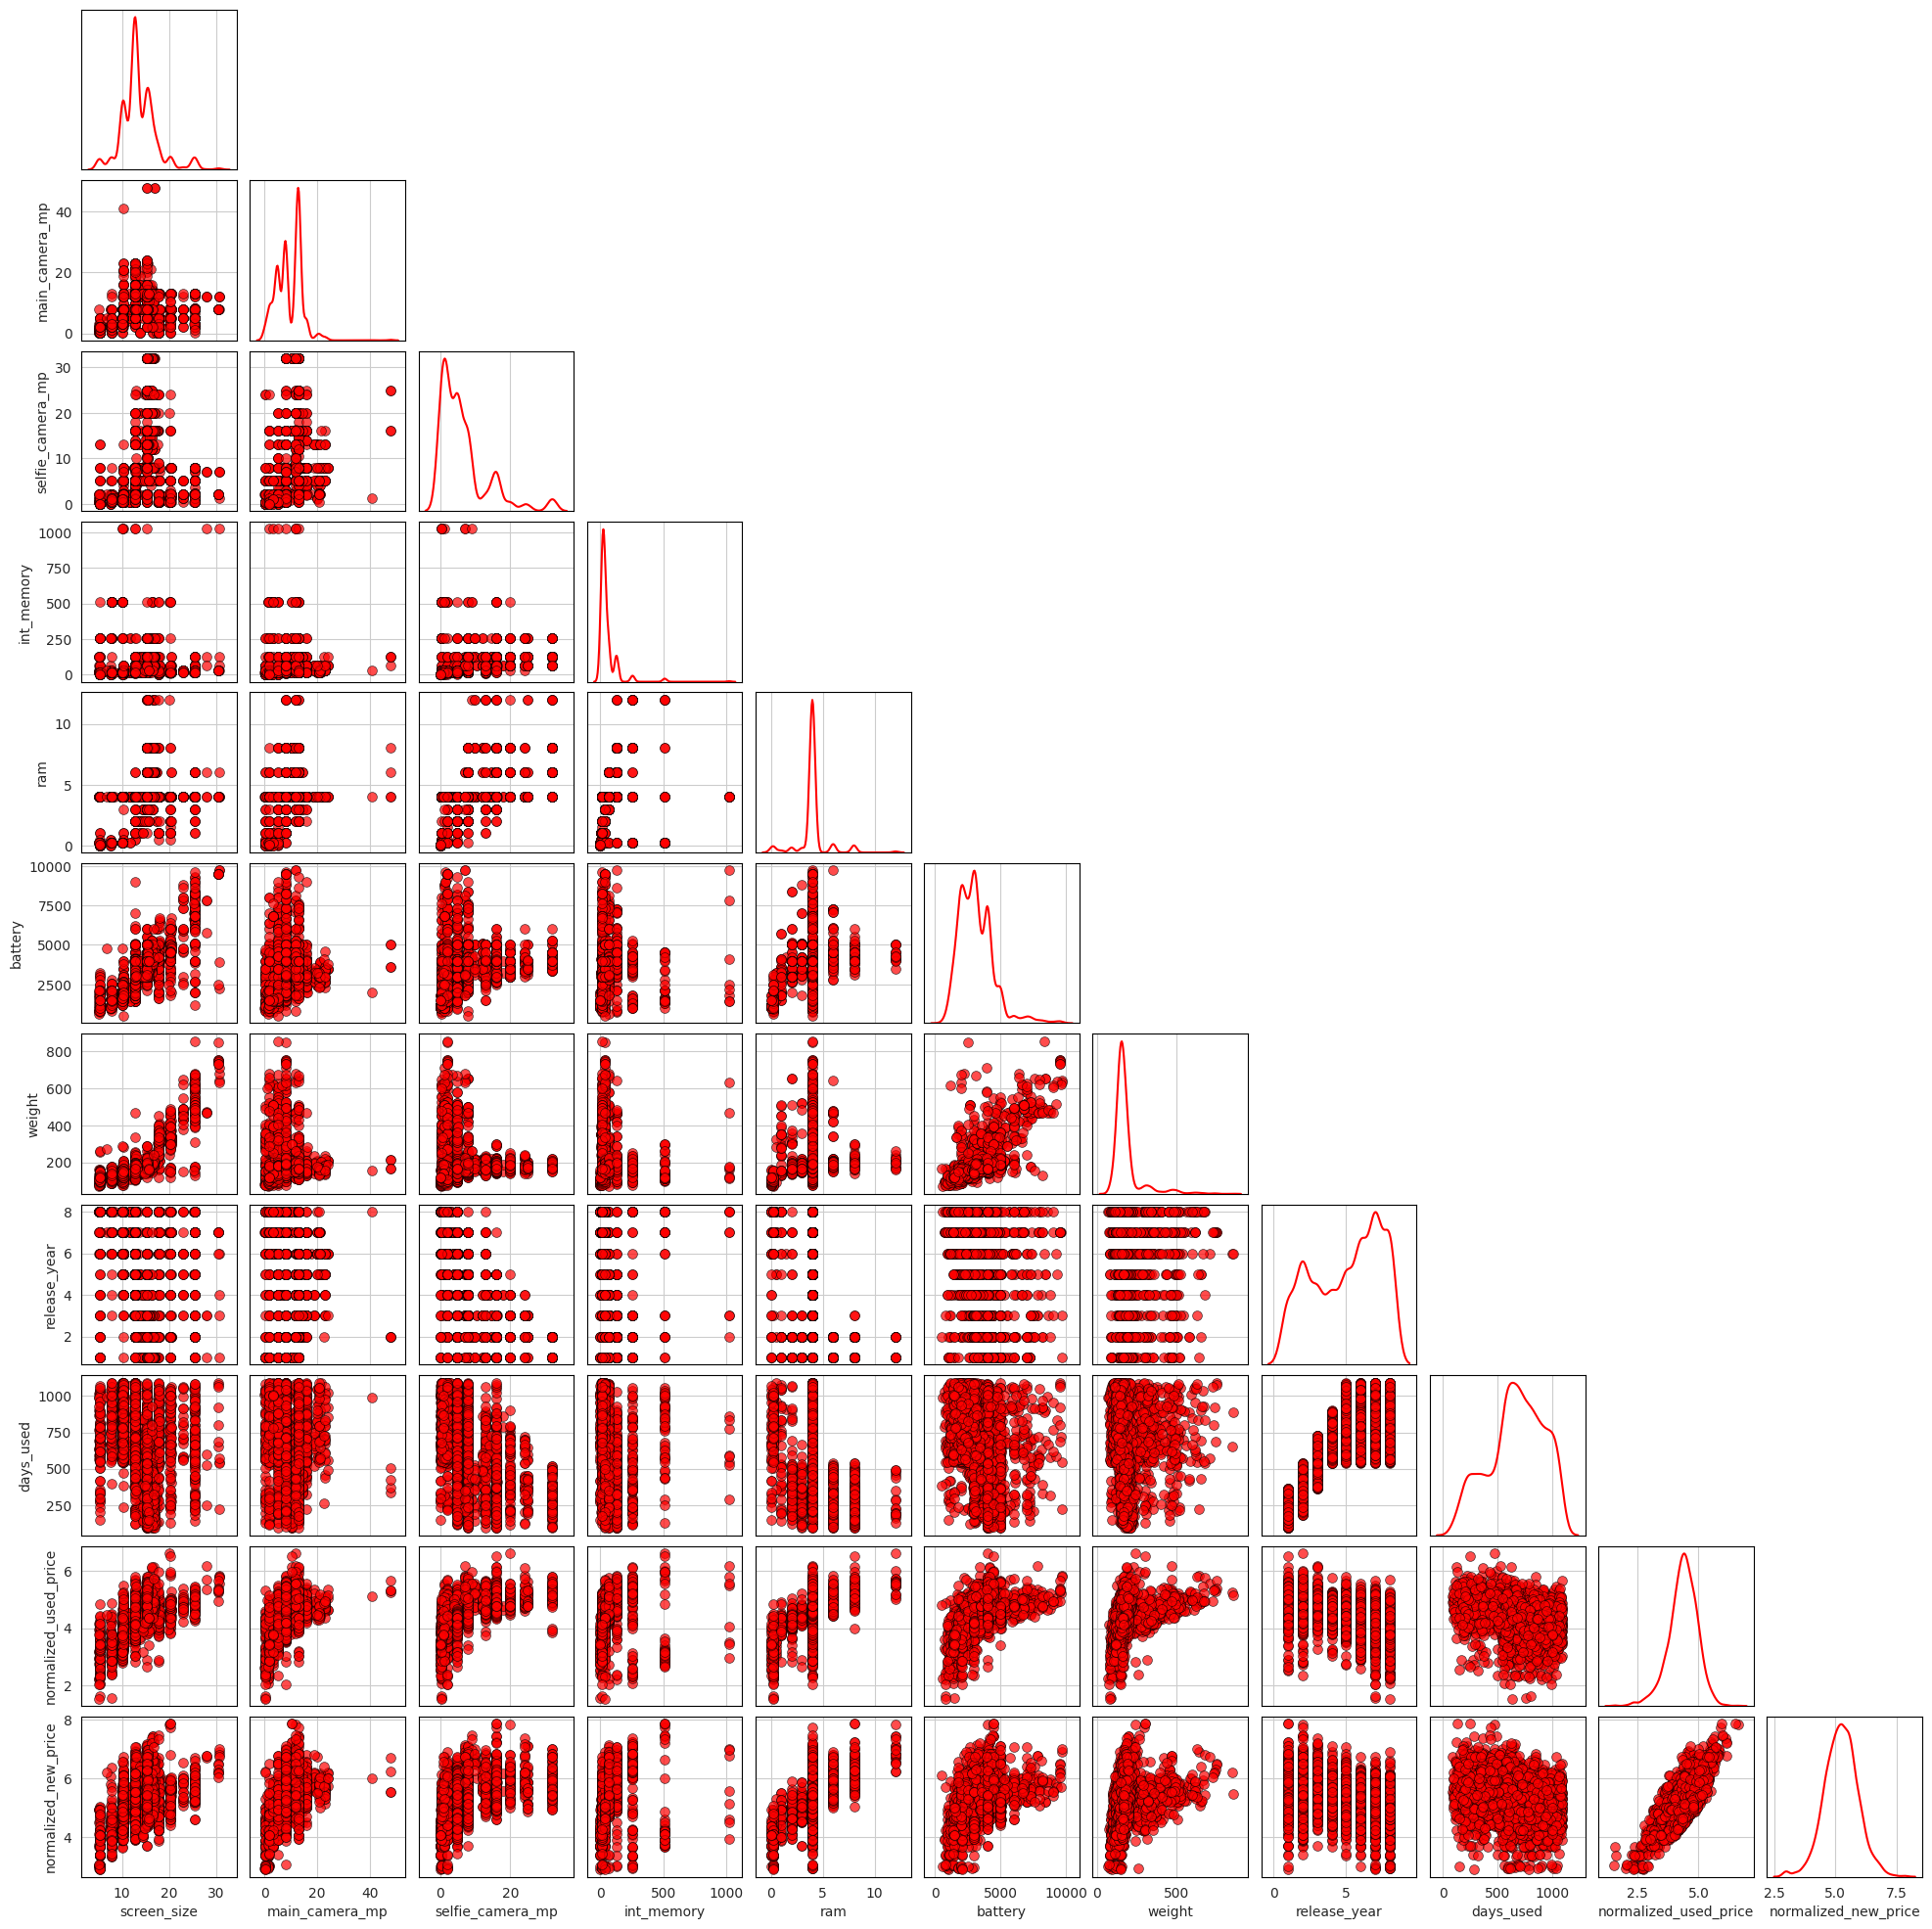

In [ ]:
# Pair plot of all continuous variables
sns.set_style("whitegrid");
pp = sns.pairplot(df_cont,
                  corner = True,
                  diag_kind='kde',
                  kind='scatter',
                  plot_kws={"edgecolor": "black",
                            "linewidth": 0.5,
                            'alpha': 0.7,
                            's': 50,
                            'color':'red'
                            },
                  diag_kws={'fill': False,
                            "fill": False,
                            "color": "red"
                            },
                  height = 2,
                  );

# Customize the plot borders (for the individual subplots)
for ax in plt.gcf().axes:
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_edgecolor('black')
    ax.spines['right'].set_edgecolor('black')
    ax.spines['top'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Set figure size in inches
pp.fig.set_size_inches(20, 20)

# Show plot
plt.show();

* Observations:
There are several attributes that are linearly related to normalized
used price, such as **screen size** and **release year**, but some are slightly
non-linear, such as **selfie camera mp** and **battery**.

### Questions

1. What does the distribution of normalized used device prices look like?

In [ ]:
# Five number summary for normalized used price
print("-" * 50)
print("Five number summary for normalized used price:")
print("-" * 50)

df['normalized_used_price'].describe()

--------------------------------------------------
Five number summary for normalized used price:
--------------------------------------------------


,normalized_used_price
count,3454.000
mean,4.365
std,0.589
min,1.537
25%,4.034
50%,4.405
75%,4.756
max,6.619


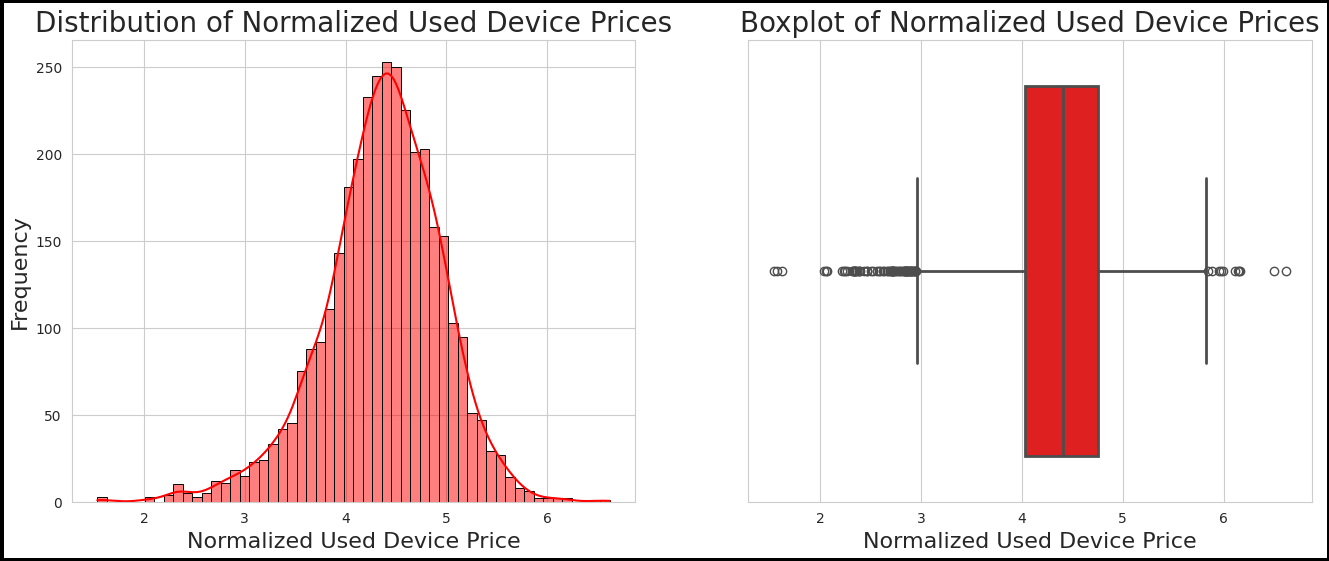

In [ ]:
# Histogram of normalized used device price

# Figure template
plt.figure(figsize=(16, 6),
           edgecolor = 'black',
           linewidth = 5
           )

# --- Histogram (normalized used price) ---
plt.subplot(1,2,1)
sns.histplot(df['normalized_used_price'],
             edgecolor = 'black',
             color = 'red',
             kde = True
             )

plt.xlabel('Normalized Used Device Price', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of Normalized Used Device Prices', fontsize = 20)

# --- Boxplot (normalized used price) ---
plt.subplot(1,2,2)
sns.boxplot(df['normalized_used_price'],
            color = 'red',
            linewidth = 2,
            orient = 'h'
            )

# Figure details
plt.xlabel('Normalized Used Device Price', fontsize = 16)
plt.title('Boxplot of Normalized Used Device Prices', fontsize = 20)

# Show plot
plt.show()

* Observations: The distribution for normalized used device prices
appears to be normal, but with several outliers above and below the median.

2. What percentage of the used device market is dominated by Android devices?

In [ ]:
# Calculate the total number of android devices
Numb_android = df[df['os'] == 'Android']['os'].value_counts()
print("The Number of Androids in this sample is ",
      Numb_android.iloc[0],'.',sep='')

# Calculate the total number of devices
Numb_total = df.shape[0]
print("The number of total devices in this sample is ",
      Numb_total,'.',sep='')

# Print the percentage of Android devices in the sample.
print("The percentage of used devices that are Android is ",
      round(((Numb_android.iloc[0])/Numb_total)*100,2), "%", sep = "")

The Number of Androids in this sample is 3214.
The number of total devices in this sample is 3454.
The percentage of used devices that are Android is 93.05%


3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [ ]:
# How does the amount of RAM vary with brand

# Print out table with the mean and standard deviation of RAM
# (in GB) across brands
Mean_RAM_by_brand = df.groupby('brand_name')['ram'].mean()
Std_RAM_by_brand = df.groupby('brand_name')['ram'].std()
RAM_dict = {'Mean': Mean_RAM_by_brand, 'Std': Std_RAM_by_brand}
RAM_df = pd.DataFrame(RAM_dict)

print("-" * 50)
print("Mean and standard deviation of RAM by brand:")
print("-" * 50)
print(RAM_df)
print("\nThe highest standard deviation is for the brand ",
      RAM_df['Std'].idxmax(), " with a standard deviation of ",
      round(RAM_df['Std'].max(),4), ".", sep = "")

--------------------------------------------------
Mean and standard deviation of RAM by brand:
--------------------------------------------------
            Mean   Std
brand_name            
Acer       3.902 0.500
Alcatel    3.407 1.264
Apple      4.000 0.607
Asus       4.049 0.601
BlackBerry 3.830 0.800
Celkon     1.614 1.832
Coolpad    3.955 0.213
Gionee     3.933 0.501
Google     4.533 0.915
HTC        4.000 0.332
Honor      4.603 1.625
Huawei     4.655 1.595
Infinix    2.600 0.843
Karbonn    3.353 1.442
LG         3.937 1.076
Lava       3.278 1.414
Lenovo     3.886 0.774
Meizu      4.452 1.224
Micromax   3.679 1.053
Microsoft  4.000 0.000
Motorola   3.943 1.330
Nokia      2.420 1.889
OnePlus    6.364 2.592
Oppo       4.961 2.123
Others     3.778 1.016
Panasonic  4.000 0.000
Realme     4.195 1.327
Samsung    4.199 1.377
Sony       4.070 0.480
Spice      3.750 0.951
Vivo       4.756 1.638
XOLO       4.000 0.000
Xiaomi     4.583 1.508
ZTE        4.023 0.910

The highest standard dev

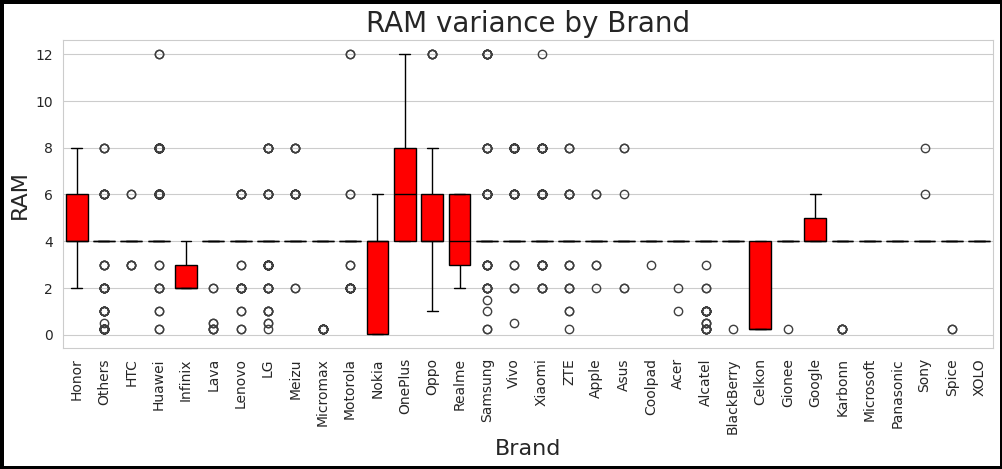

In [ ]:
# Make a boxplot of RAM across brands

# Make a keyword argument for the style of the graph
fig_properties = {
    'boxprops':{'facecolor':'red', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

# Figure template
plt.figure(figsize=(12, 4),
           edgecolor = 'black',
           linewidth = 5
           )

# boxplot
sns.boxplot(data=df,
            x="brand_name",
            y="ram",
            **fig_properties
            )

# Figure details
plt.xlabel('Brand', fontsize = 16)
plt.ylabel('RAM', fontsize = 16)
plt.title('RAM variance by Brand', fontsize = 20)
plt.xticks(rotation=90)

# Show plot
plt.show()

* Observations:
  * Most brands offer a good selection of RAM choices across devices.
  * Very few brands offer up to 12 GB of RAM, but most brands are
    willing to offer low levels of RAM ( < 1GB ). Almost all devices for
    Nokia, Celkon, Infinix, Coolpad, and Micromax, for example, are
    below 4 GB
  * Some brands like OnePlus offer exclusively higher RAM (> 4 GB only)

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
# Make a dataframe for devices with batteries over 4500 mAh.
df_large_battery = df[df.battery > 4500]

# Calculate the mean and standard deviation for each brand
Mean_WT_by_brand = df.groupby('brand_name')['weight'].mean()
Std_WT_by_brand = df.groupby('brand_name')['weight'].std()
WT_dict = {'Mean': Mean_WT_by_brand, 'Std': Std_WT_by_brand}
WT_df = pd.DataFrame(WT_dict)

# Print out table with means and standard deviations
print("-" * 100)
print("Mean and standard deviation of weight by brand",
      "for devices with batteries over 4500 mAh:")
print("-" * 100)
print(WT_df)
print("\nThe highest standard deviation is for the brand ",
      WT_df['Std'].idxmax(), " with a standard deviation of ",
      round(WT_df['Std'].max(),4), ".", sep = "")

----------------------------------------------------------------------------------------------------
Mean and standard deviation of weight by brand for devices with batteries over 4500 mAh:
----------------------------------------------------------------------------------------------------
              Mean     Std
brand_name                
Acer       225.873 133.207
Alcatel    169.010  75.133
Apple      320.423 175.809
Asus       218.598 111.813
BlackBerry 160.568  21.594
Celkon     134.621  17.005
Coolpad    154.382  19.729
Gionee     161.477  32.476
Google     187.733  92.629
HTC        155.247  31.300
Honor      179.841  49.471
Huawei     206.979  94.957
Infinix    184.400  15.079
Karbonn    138.828  59.577
LG         169.550  74.177
Lava       140.408  18.664
Lenovo     223.618 132.038
Meizu      160.790  19.326
Micromax   146.275  43.537
Microsoft  172.795 113.323
Motorola   167.072  22.330
Nokia      144.883  62.529
OnePlus    181.318  20.013
Oppo       166.921  23.869
Others 

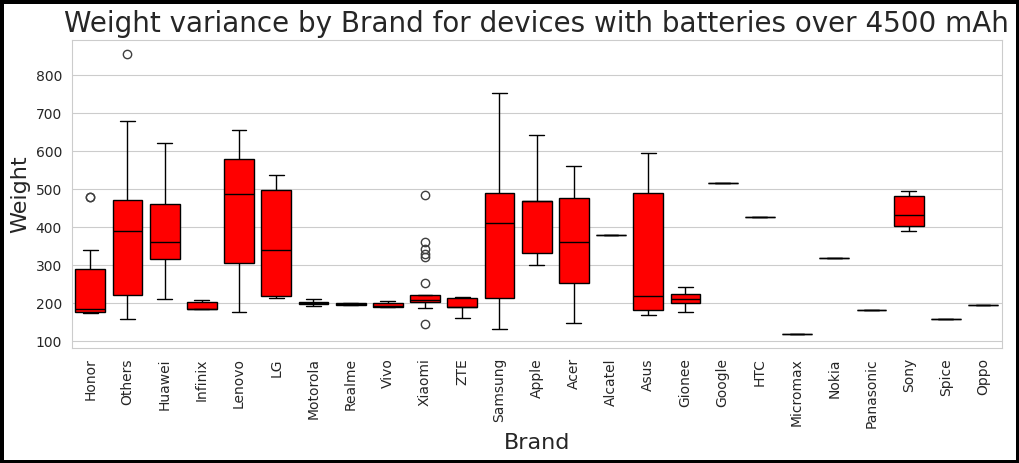

In [ ]:
# Plot weight variance by brand for devices with batteries over 4500 mAh

# Figure template
plt.figure(figsize=(12, 4),
           edgecolor = 'black',
           linewidth = 5
           )

# Boxplot
sns.boxplot(data=df_large_battery,
            x="brand_name",
            y="weight",
            **fig_properties
            )

# Figure details
plt.xlabel('Brand', fontsize = 16)
plt.ylabel('Weight',fontsize = 16)
plt.title('Weight variance by Brand for devices with",
          "batteries over 4500 mAh',
          fontsize = 20)
plt.xticks(rotation=90)

# Show plot
plt.show()

* Observations:
  * In general, the weight of devices with batteries over 4500 mAh are
    approximiately above 200g.
  * Some brands, however, offer devices with high-capacity batteries in
    a variety of weights, such as Acer, Lenovo, LG, Asus, and Samsung.
  * Some brands offer limited weight choices for devices with batteries
    over 4500 mAh, such as Google, HTC, Micromax, and Nokia.

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
# Convert screen size in centimeters to inches
df['screen_size'] = df['screen_size'] / 2.54

# Make a dataframe for devices with screens larger than 6 inches.
df_large_screen = df[df.screen_size > 6]
print("There are ", df_large_screen.shape[0],
      " phones and tablets with screens larger than 6 inches.", sep = "")

There are 1099 phones and tablets with screens larger than 6 inches.


In [ ]:
# Create table with the count of devices with
# screens larger than 6 inches by rand
Above_six = df_large_screen.groupby('brand_name')['screen_size'].count()

print("-" * 75)
print("Count of devices with screens larger than 6 inches by brand:")
print("-" * 75)
print(Above_six)
print("\nThe brand with the most devices with screen",
      "sizes over 6 inches is ",
      Above_six.idxmax(), " with ",
      round(Above_six.max(),4), ".", sep = "")

---------------------------------------------------------------------------
Count of devices with screens larger than 6 inches by brand:
---------------------------------------------------------------------------
brand_name
Acer          19
Alcatel       26
Apple         24
Asus          41
Coolpad        3
Gionee         3
Google         4
HTC            7
Honor         72
Huawei       149
Infinix       10
Karbonn        2
LG            59
Lenovo        69
Meizu         17
Micromax       7
Microsoft      1
Motorola      42
Nokia         15
OnePlus       16
Oppo          70
Others        99
Panasonic      2
Realme        40
Samsung      119
Sony          12
Spice          2
Vivo          80
XOLO           3
Xiaomi        69
ZTE           17
Name: screen_size, dtype: int64

The brand with the most devices with screen sizes over 6 inches is Huawei with 149.


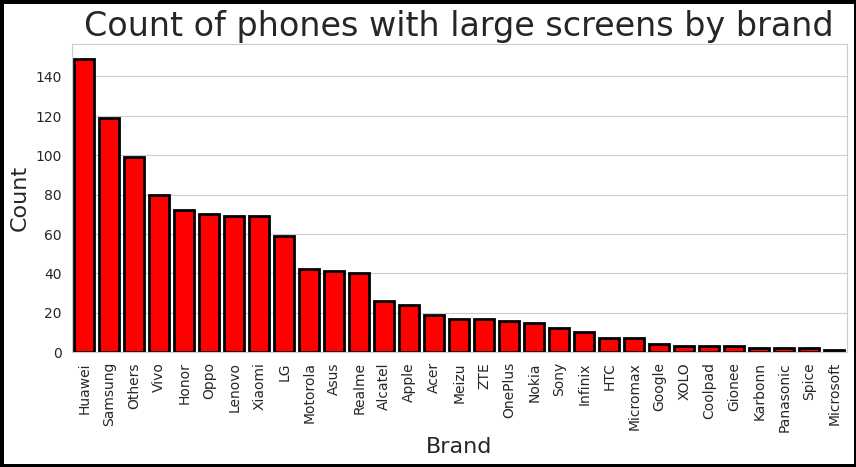

In [ ]:
# Create a bar plot showing the number of devices for each brand
#that are over 6 inches in screen size

# Sort Values from most to least
sorted_greater_than_6 = Above_six.sort_values(ascending=False)

# Figure template
plt.figure(figsize=(10, 4),
           edgecolor = 'black',
           linewidth = 5
           )

# Barplot
sns.set_style("whitegrid")
sns.barplot(sorted_greater_than_6,
            edgecolor = 'black',
            linewidth = 2,
            facecolor = 'red'
            )

# Figure details
plt.xlabel('Brand', fontsize = 16);
plt.ylabel('Count', fontsize = 16);
plt.xticks(rotation=90);
plt.title('Count of phones with large screens by brand', fontsize = 24);

# Show plot
plt.show()

* Observations
  * Huawai, Samsung, and Vivo lead in the number of devices with screen
    sizes above 6 inches.
  * Brands labeled as "Others" make up a fair share of the market in this
    category.
  * Some brands like Google and Microsoft do not offer many devices with
    larger screens.

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
# Make dataframe with only 8 megapixel camera devices
df_above_8 = df[df.selfie_camera_mp > 8]
print("There are ", df_above_8.shape[0],
      " devices with greater than 8 MP selfie cameras.", sep = "")

There are 655 devices with greater than 8 MP selfie cameras.


In [ ]:
# Group the number of devices with 8 MP cameras by brand.
Above_8MP = df_above_8.groupby('brand_name')['selfie_camera_mp'].count()

print("-" * 75)
print("Count of devices with greater than 8 MP selfie cameras by brand:")
print("-" * 75)
print(Above_8MP)
print("\nThe max devices with an 8MP selfie camera is for the brand ",
      Above_8MP.idxmax(), " with ",
      round(Above_8MP.max(),4), ".", sep = "")

---------------------------------------------------------------------------
Count of devices with greater than 8 MP selfie cameras by brand:
---------------------------------------------------------------------------
brand_name
Acer           1
Asus           6
BlackBerry     2
Coolpad        3
Gionee         4
HTC           20
Honor         41
Huawei        87
Infinix        4
LG            32
Lenovo        14
Meizu         24
Micromax       2
Motorola      26
Nokia         10
OnePlus       18
Oppo          75
Others        34
Panasonic      2
Realme        18
Samsung       57
Sony          14
Vivo          78
Xiaomi        63
ZTE           20
Name: selfie_camera_mp, dtype: int64

The max devices with an 8MP selfie camera is for the brand Huawei with 87.


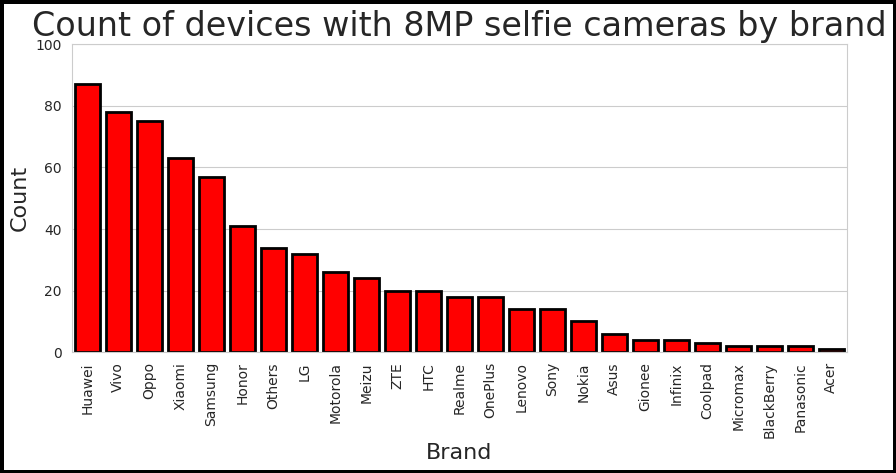

In [ ]:
# Create a bar plot showing the count of devices with 8MP for each brand

# Sort values from most to least
sorted_greater_than_8MP = Above_8MP.sort_values(ascending=False)

# Figure template
plt.figure(figsize=(10, 4),
           edgecolor = 'black',
           linewidth = 5
           )

# Barplot
sns.set_style("whitegrid")
sns.barplot(sorted_greater_than_8MP,
            edgecolor = 'black',
            linewidth = 2,
            facecolor = 'red'
            )

# Figure details
plt.xlabel('Brand', fontsize = 16);
plt.ylabel('Count', fontsize = 16);
plt.xticks(rotation=90);
plt.ylim(0,100)
plt.title('Count of devices with 8MP selfie cameras by brand',
          fontsize = 24);

# Show plot
plt.show()

* Observations
  * Huawai, Vivo, and Oppo lead in the number of devices with 8MP selfie
    cameras.
  * Some brands like BlackBerry and Infinix do not offer many devices with
    selfie cameras above 8 MP.

7. Which attributes are highly correlated with the normalized price of a used device?

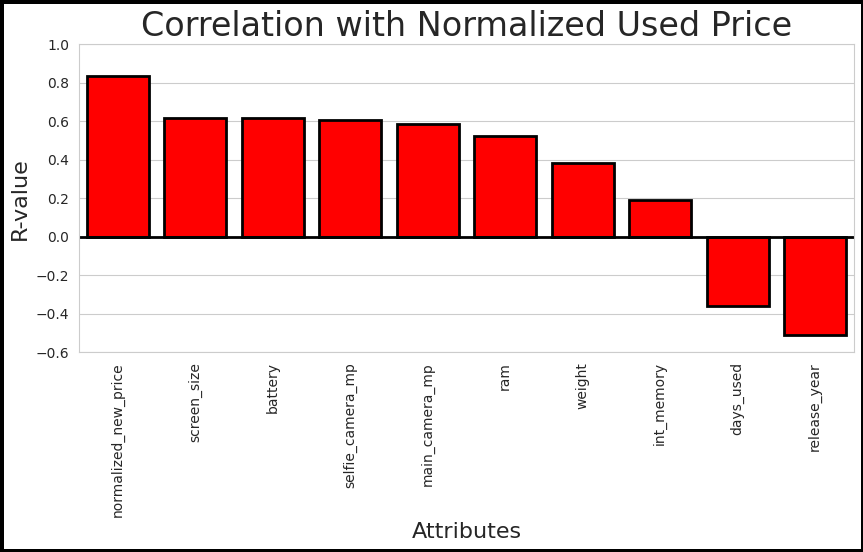

In [ ]:
# Make a sorted list of the correlations with normalized used price.
df_cont.corr()['normalized_used_price'].sort_values(ascending=False)

# Get rid of the self-correlation
df_cont.corr()['normalized_used_price'].sort_values(ascending=False)[1:]

# Figure template
plt.figure(figsize=(10, 4),
           edgecolor = 'black',
           linewidth = 5
           )

# calculate correlations
cont_corrs = df_cont.corr()['normalized_used_price'].sort_values(ascending=False)[1:]

# Barplot
sns.set_style("whitegrid")
sns.barplot(cont_corrs,
            edgecolor = 'black',
            linewidth = 2,
            facecolor = 'red'
            );

# Figure details
plt.xlabel('Attributes', fontsize = 16);
plt.ylabel('R-value', fontsize = 16);
plt.xticks(rotation=90);
plt.title('Correlation with Normalized Used Price', fontsize = 24);
plt.axhline(y=0, color='black', linewidth=2)
plt.ylim(-0.6, 1)

# Figure plot
plt.show()

In [ ]:
# List out the attributes with the 5 strongest positive correlations
print("Top positive correlations with normalized used price: ")
df_cont.corr()['normalized_used_price'].sort_values(ascending=False)[1:6]

Top positive correlations with normalized used price: 


,normalized_used_price
normalized_new_price,0.834
screen_size,0.615
battery,0.614
selfie_camera_mp,0.608
main_camera_mp,0.587


In [ ]:
# List out the attributes with negative correlations
print("Top negative correlations with normalized used price: ")

# Negative correlations
all_corrs = df_cont.corr()['normalized_used_price']
neg_corrs = all_corrs[all_corrs < 0];
neg_corrs.sort_values(ascending=True)

Top negative correlations with normalized used price: 


,normalized_used_price
release_year,-0.510
days_used,-0.358


## Data Preprocessing

### Missing value treatment


In [ ]:
# Identify columns with missing values
print("Columns with missing data:")
df[df.columns[df.isnull().any()]].isnull().sum()

Columns with missing data:


,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6
weight,7


* Observations: Six variables have missing variables, with main_camera_mp leading the way at 179.

In [ ]:
# Replace the missing values with median values.

# Create new data frame so we don't overwrite the original
df_median_fill = df.copy()

# Because some values rely on the brand and the year
# the device came out, it makes sense to determine
# the medians grouped by those factors

# For all columns with missing values replace missing values
for col_name in ['main_camera_mp',
                 'selfie_camera_mp',
                 'int_memory',
                 'ram',
                 'battery',
                 'weight'
                 ]:

  # Define replacement variables
  filler = df_median_fill.groupby(['release_year',
                                   'brand_name']
                                  )[col_name].transform("median")

  # Replace missing values
  df_median_fill[col_name] = df_median_fill[col_name].fillna(value=filler)

In [ ]:
# print out attributes with remaining missing values
print("Columns with missing data:")
df_median_fill[df_median_fill.columns[df_median_fill.isnull().any()]
               ].isnull().sum()

Columns with missing data:


,0
main_camera_mp,179
selfie_camera_mp,2
battery,6
weight,7


* Observations: After grouping by release year and brand, four variables still have missing values.

In [ ]:
# Try grouping by brand name only
for col_name in ['main_camera_mp',
                 'selfie_camera_mp',
                 'battery',
                 'weight'
                 ]:

  # Define replacement variables
  Filler = df_median_fill.groupby(['brand_name'])[col_name].transform("median")

  # Replace missing values
  df_median_fill[col_name] = df_median_fill[col_name].fillna(value=Filler)

In [ ]:
# print out attributes with remaining missing values
print("Columns with missing data:")
df_median_fill[df_median_fill.columns[df_median_fill.isnull().any()]
               ].isnull().sum()

Columns with missing data:


,0
main_camera_mp,10


• Observations: After grouping by brand, one variable still has missing values.

In [ ]:
# Replace remaining 10 values with the column mean

# Define replacement values
Filler = df_median_fill['main_camera_mp'].median()

# Replace missing values
df_median_fill['main_camera_mp'] = df_median_fill['main_camera_mp'
                                                  ].fillna(Filler)

In [ ]:
# print out attributes with remaining missing values
print("Columns with missing data:")
df_median_fill[df_median_fill.columns[df_median_fill.isnull().any()]
               ].isnull().sum()

Columns with missing data:


,0


* Observations: There are no more missing values.

### Feature engineering

In [ ]:
# Transform release year to be years since 2021
df_median_fill['release_year'] = 2021 - df_median_fill['release_year']

In [ ]:
# Check release year.
df_median_fill.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,5.709,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,1,127,4.308,4.715
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,1,325,5.162,5.519
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,1,162,5.111,5.885
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,1,345,5.135,5.631
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,1,293,4.390,4.948


### Outlier detection and treatment

In [ ]:
# Create function to count outliers
def count_outliers_IQR(data):
    data = np.array(data)

    # calculate Quantile 1
    Q1 = np.percentile(data, 25)

    # calculate Quantile 3
    Q3 = np.percentile(data, 75)

    # Interquartile range
    IQR = Q3 - Q1
    threshold = 1.5 * IQR

    # Lower and higher thresholds
    low_outlier = Q1 - threshold
    high_outlier = Q3 + threshold

    # Collect outliers
    outliers = data[(data < low_outlier) | (data > high_outlier)]

    # Return number of outliers
    return len(outliers)

### Make a plot for all continuous variables showing the outliers

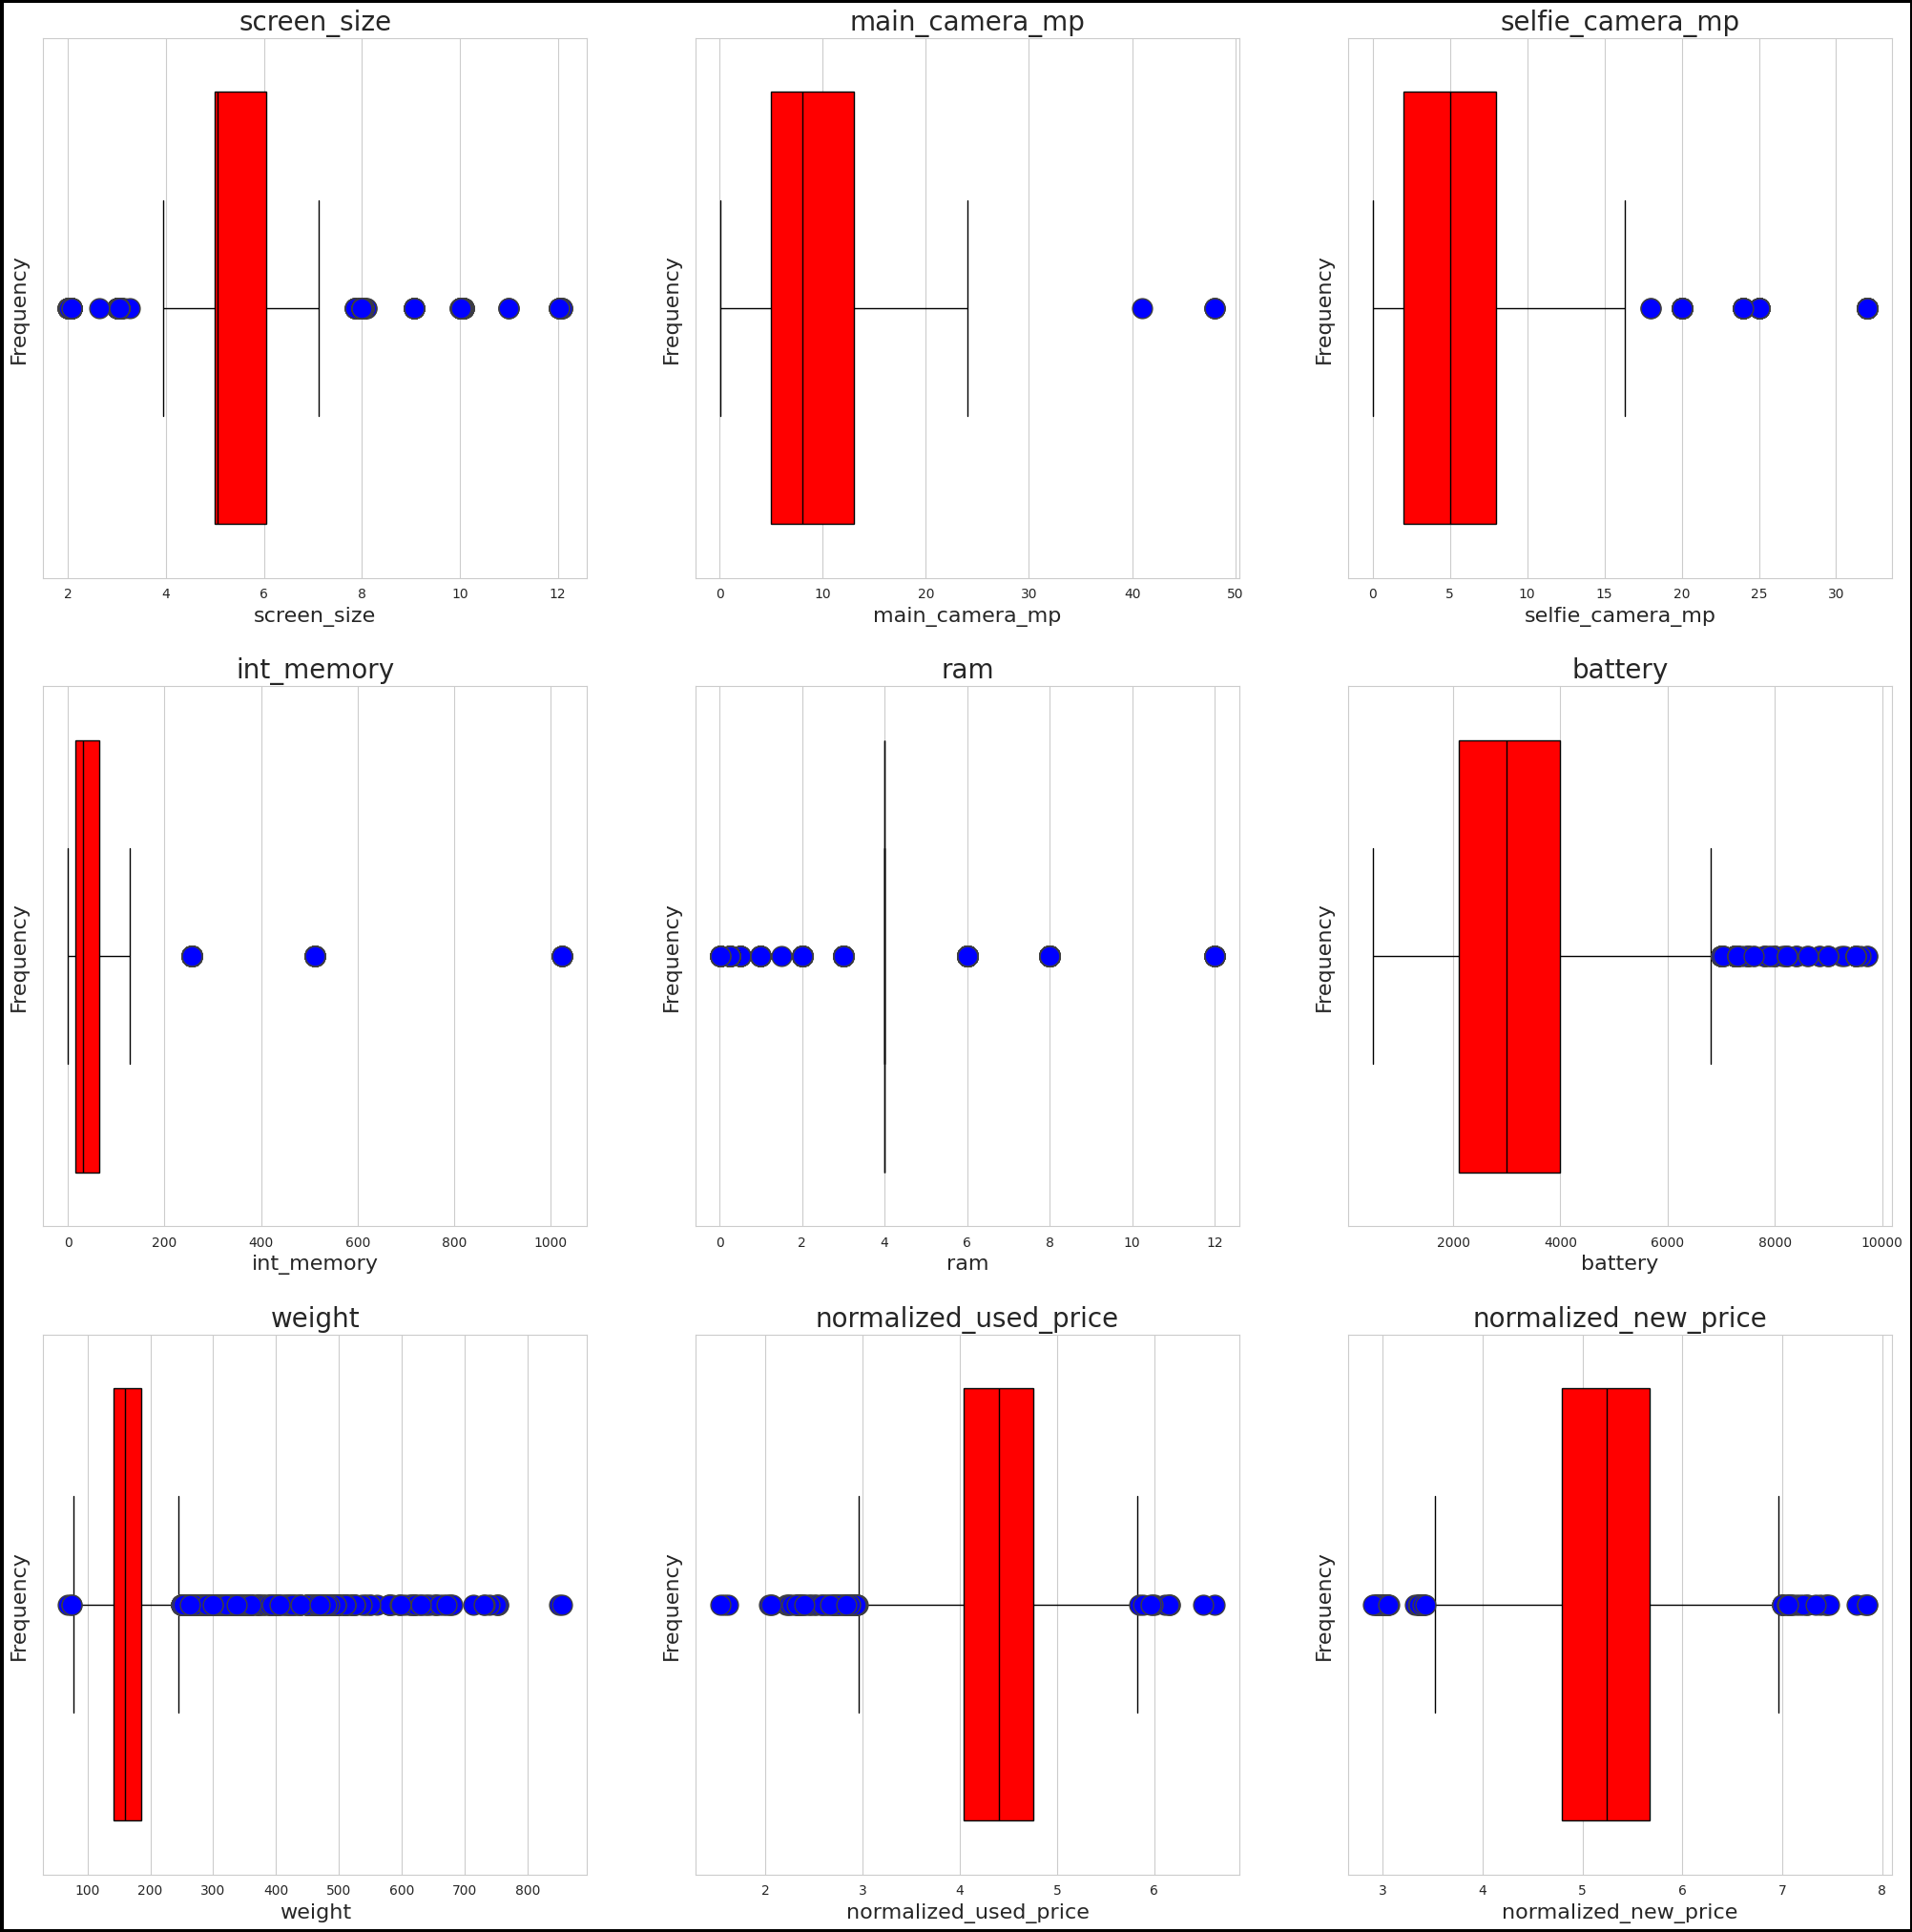

In [ ]:
# Determine numeric columns
numb_cols = df_median_fill.dtypes[df_median_fill.dtypes != 'object'
                                  ].index

list_out = [];
plt.figure(figsize=(25, 25),
           edgecolor = 'black',
           linewidth = 5
           );

cnt = 0;
for numb, col in enumerate(df_median_fill):
  if col in numb_cols:
    if count_outliers_IQR(df_median_fill[col]) > 0:
      list_out.append(col)
      # Boxplot for that column
      plt.subplot(3, 3, cnt+1)
      sns.boxplot(data = df_median_fill,
                      x=col,
                      **fig_properties,
                      flierprops={'marker': 'o',
                                  'markerfacecolor': 'blue',
                                  'markersize': 15,
                                  'linestyle': 'none'});

      # Figure details
      plt.xlabel(col, fontsize = 16);
      plt.ylabel('Frequency', fontsize = 16);
      plt.title(col, fontsize = 20);

      # Increment plot number
      cnt += 1

plt.show()

* Observations:
  * There are plenty of outliers across continuous variables.
  * The weight variable has several outliers above and below the median.
  * The battery variable only has outliers above the median.
  * Although there are outliers, the test of homoscedasticity below does not indicate non-constant variance. Thus, it is unlikely that the outliers will affect interpretability of the model. No treatment to outliers will be applied.

### Preparing data for modeling

In [ ]:
# Define independent and dependent variables

# independent variables
X = df_median_fill.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df_median_fill[["normalized_used_price"]]

In [ ]:
# Add the intercept to data
X = sm.add_constant(X)

In [ ]:
# Creating dummy variables

# Create list of categorical values
cat_cols = X.select_dtypes(include=["object", "category"]
                           ).columns.tolist()

# Dummy coding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.000,5.709,13.000,5.000,64.000,3.000,3020.000,146.000,1,127,...,False,False,False,False,False,False,False,False,True,False
1,1.000,6.811,13.000,16.000,128.000,8.000,4300.000,213.000,1,325,...,False,False,False,False,False,False,False,False,True,True
2,1.000,6.571,13.000,8.000,128.000,8.000,4200.000,213.000,1,162,...,False,False,False,False,False,False,False,False,True,True
3,1.000,10.039,13.000,8.000,64.000,6.000,7250.000,480.000,1,345,...,False,False,False,False,False,False,False,False,True,True
4,1.000,6.031,13.000,8.000,64.000,3.000,5000.000,185.000,1,293,...,False,False,False,False,False,False,False,False,True,False


* Observations: OS and brand name are designated as Boolean variables. They must be binarized.

In [ ]:
# Replace booleans with 1s and zeros
X = X.replace({True: 1, False: 0})
X = X.replace({True: 1, False: 0})

In [ ]:
# Confirm the change from Boolean to binary
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.000,5.709,13.000,5.000,64.000,3.000,3020.000,146.000,1,127,...,0,0,0,0,0,0,0,0,1,0
1,1.000,6.811,13.000,16.000,128.000,8.000,4300.000,213.000,1,325,...,0,0,0,0,0,0,0,0,1,1
2,1.000,6.571,13.000,8.000,128.000,8.000,4200.000,213.000,1,162,...,0,0,0,0,0,0,0,0,1,1
3,1.000,10.039,13.000,8.000,64.000,6.000,7250.000,480.000,1,345,...,0,0,0,0,0,0,0,0,1,1
4,1.000,6.031,13.000,8.000,64.000,3.000,5000.000,185.000,1,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting data using 70:30 method
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# Explore training data
print("Length of x_train =", X_train.shape[0])
print("-" * 50)
X_train.head()

Length of x_train = 2417
--------------------------------------------------


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.000,4.051,8.000,0.300,16.000,4.000,1800.000,120.000,7,819,...,0,0,1,0,0,0,0,0,0,0
1525,1.000,6.039,13.000,5.000,32.000,4.000,4050.000,225.000,5,585,...,0,0,0,0,0,0,0,0,1,0
1128,1.000,5.000,13.000,5.000,32.000,4.000,2550.000,162.000,6,727,...,0,0,0,0,0,0,0,0,0,0
3003,1.000,5.051,8.000,5.000,16.000,4.000,3200.000,126.000,6,800,...,0,0,1,0,0,0,0,0,1,0
2907,1.000,5.071,13.000,16.000,16.000,4.000,2900.000,160.000,4,560,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Explore testing data
print("Length of x_test =", X_test.shape[0])
print("-" * 50)
X_test.head()

Length of x_test = 1037
--------------------------------------------------


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.000,6.000,8.000,2.000,16.000,4.000,3000.000,206.000,7,632,...,0,0,0,0,0,0,0,0,0,0
957,1.000,4.000,3.150,0.300,512.000,0.250,1400.000,140.000,8,637,...,0,0,0,0,0,0,0,0,0,0
280,1.000,6.059,8.000,8.000,32.000,2.000,5000.000,185.000,1,329,...,0,0,0,0,0,0,0,0,1,0
2150,1.000,5.051,13.000,16.000,64.000,4.000,3200.000,148.000,4,648,...,0,0,0,0,0,0,0,0,1,0
93,1.000,6.020,13.000,5.000,32.000,3.000,3500.000,179.000,2,216,...,0,0,0,0,0,0,0,0,1,0


* Observations:
  * The length of the training data set is 2417, which is ~70% of the total data set (2407/3454 rows).
  * The length of the testing data set is 1037, which is ~30% of the total data set (1037/3454 rows).

### Plot the original and median filled data sets side-by-side

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                           screen_size                                                                                           
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


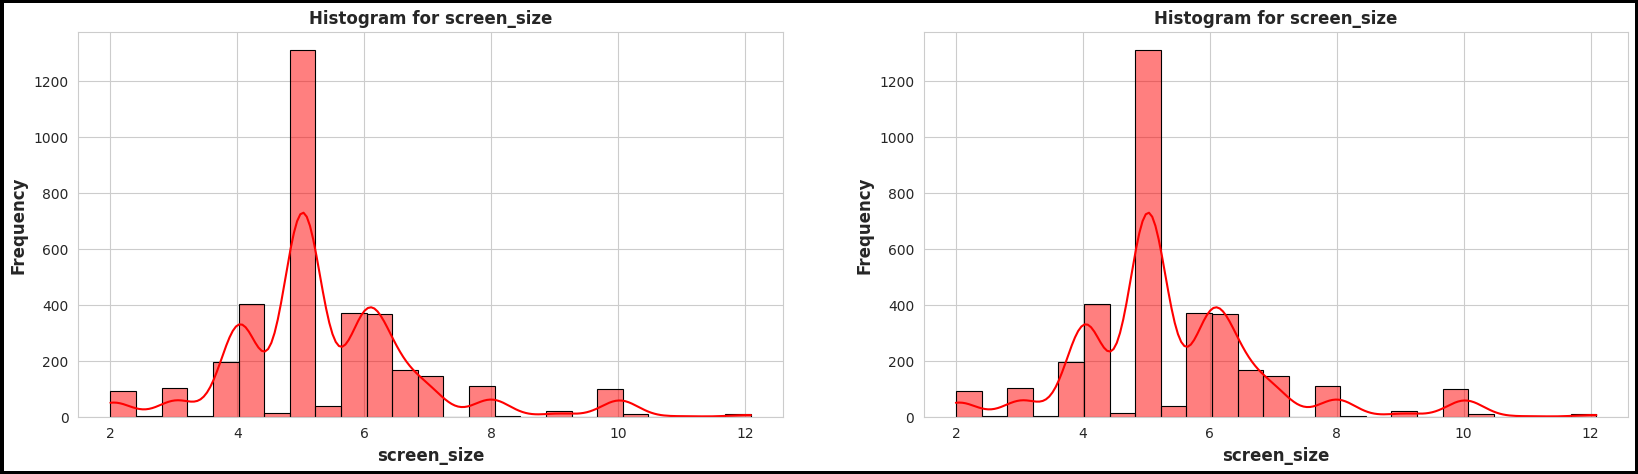

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                          main_camera_mp                                                                                         
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


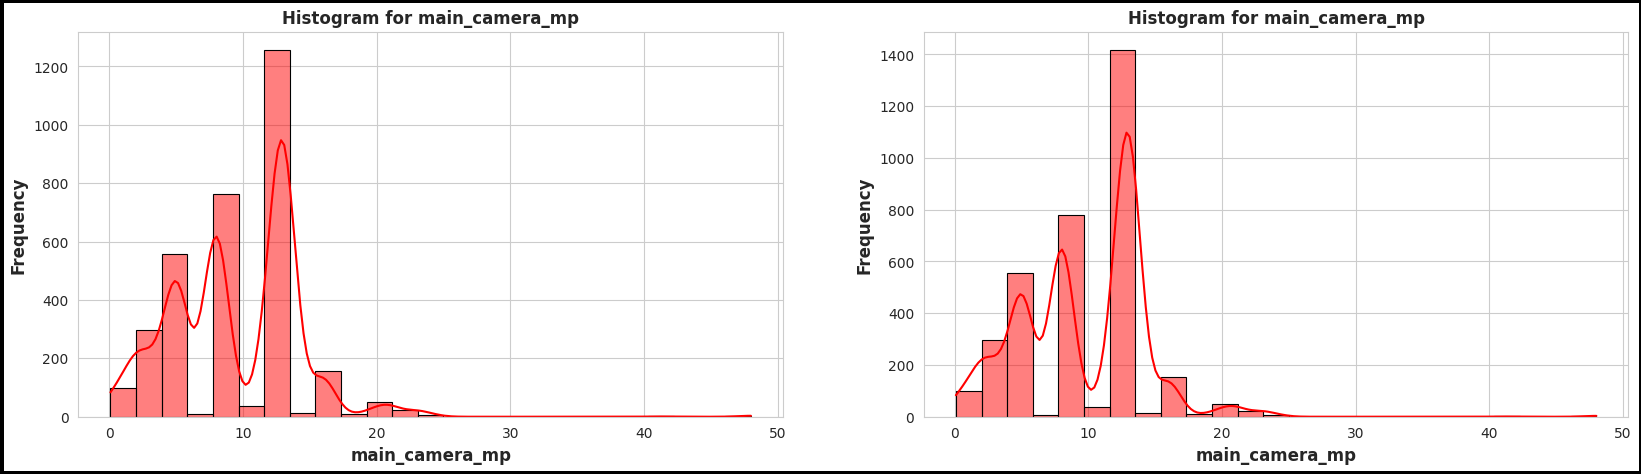

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                         selfie_camera_mp                                                                                        
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


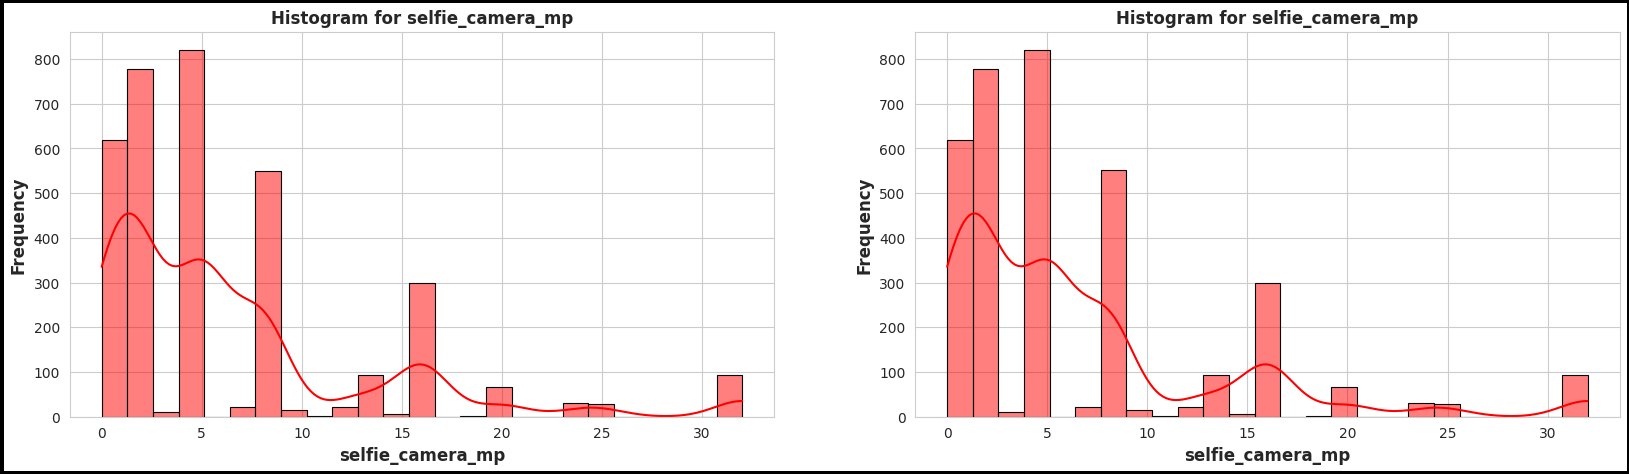

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                            int_memory                                                                                           
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


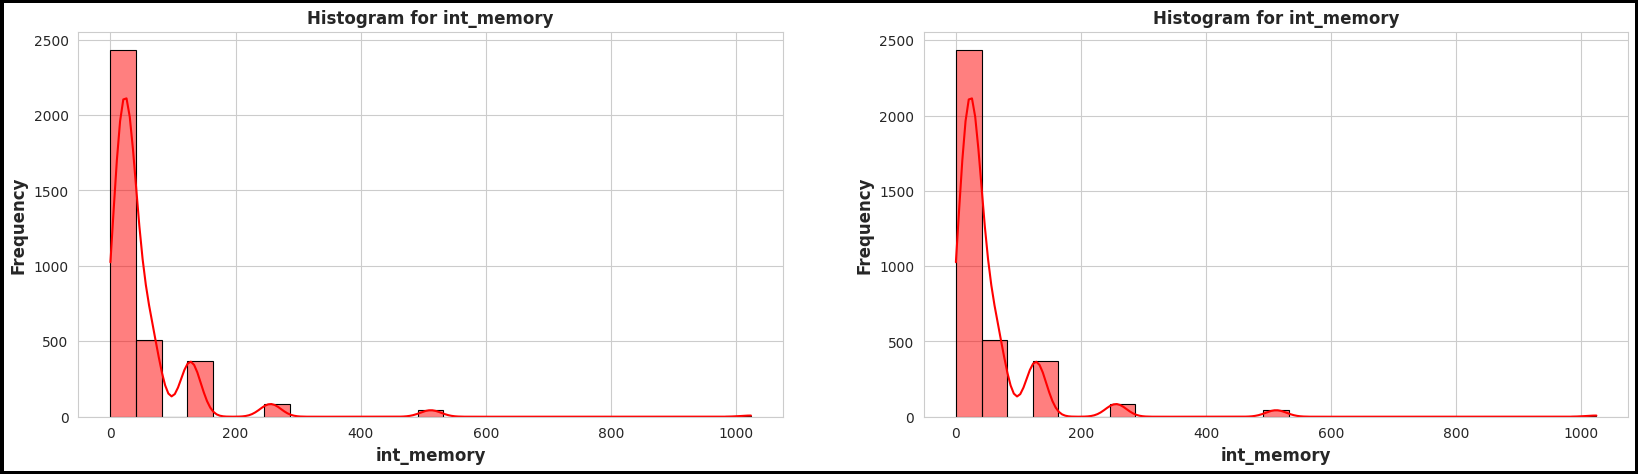

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                               ram                                                                                               
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


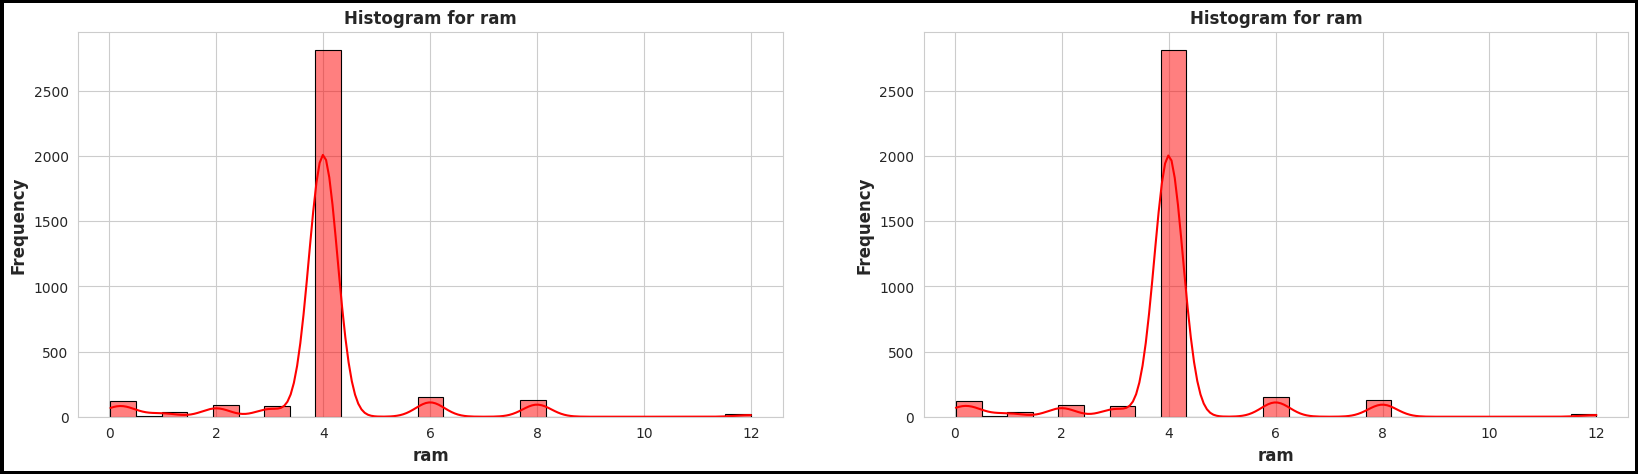

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                             battery                                                                                             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


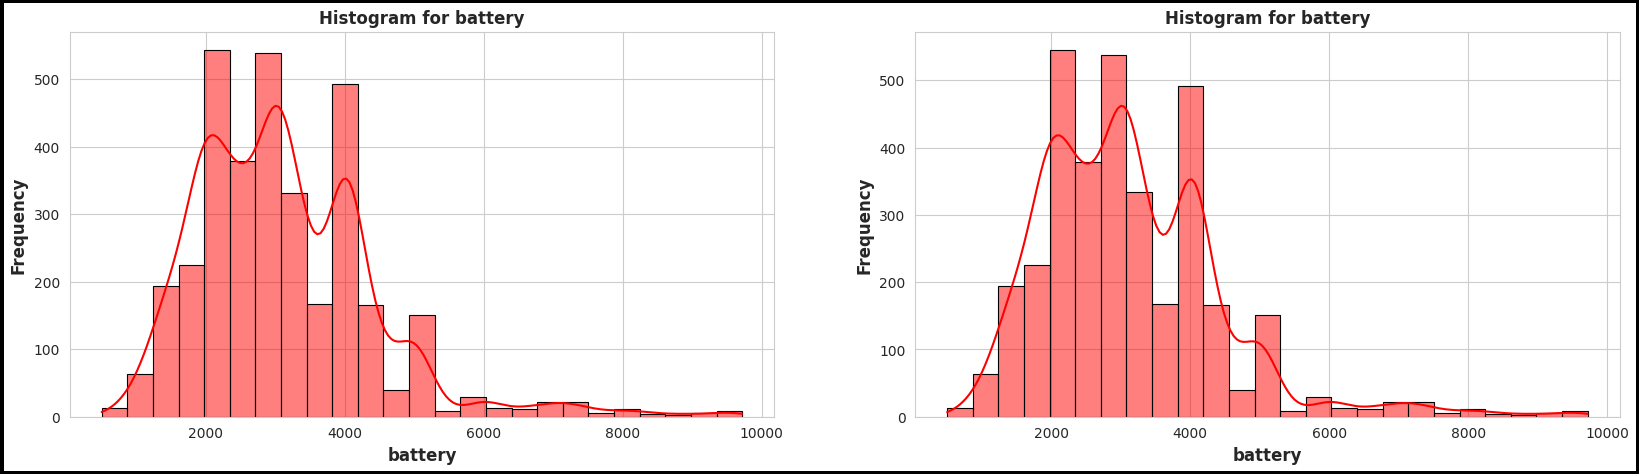

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                              weight                                                                                             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


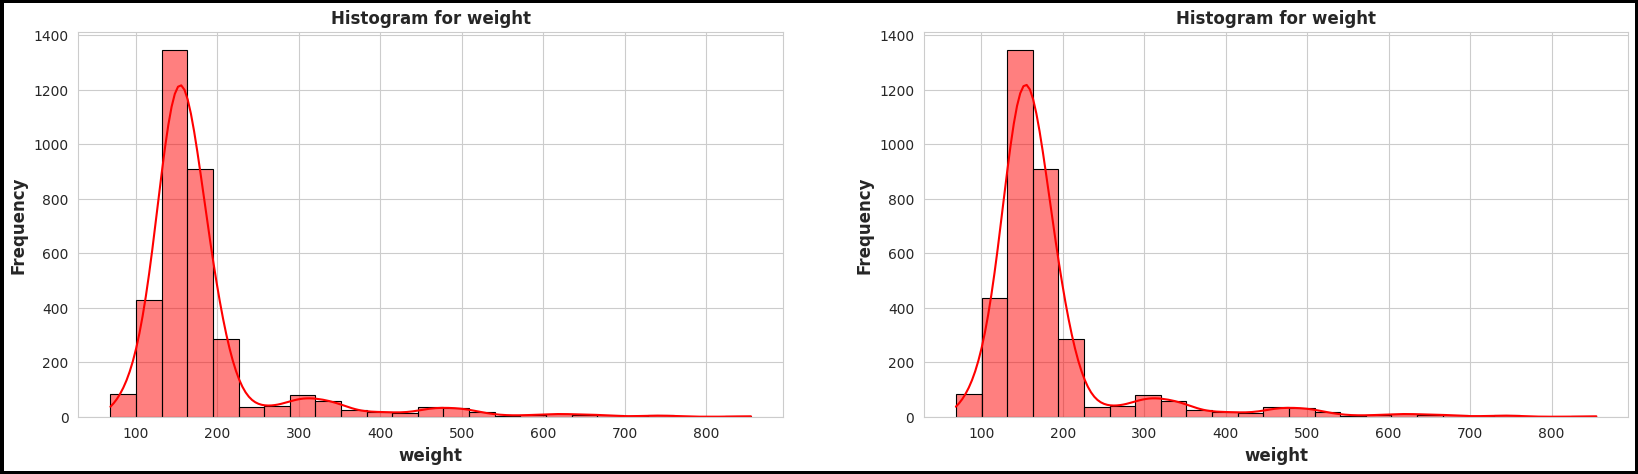

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                            days_used                                                                                            
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


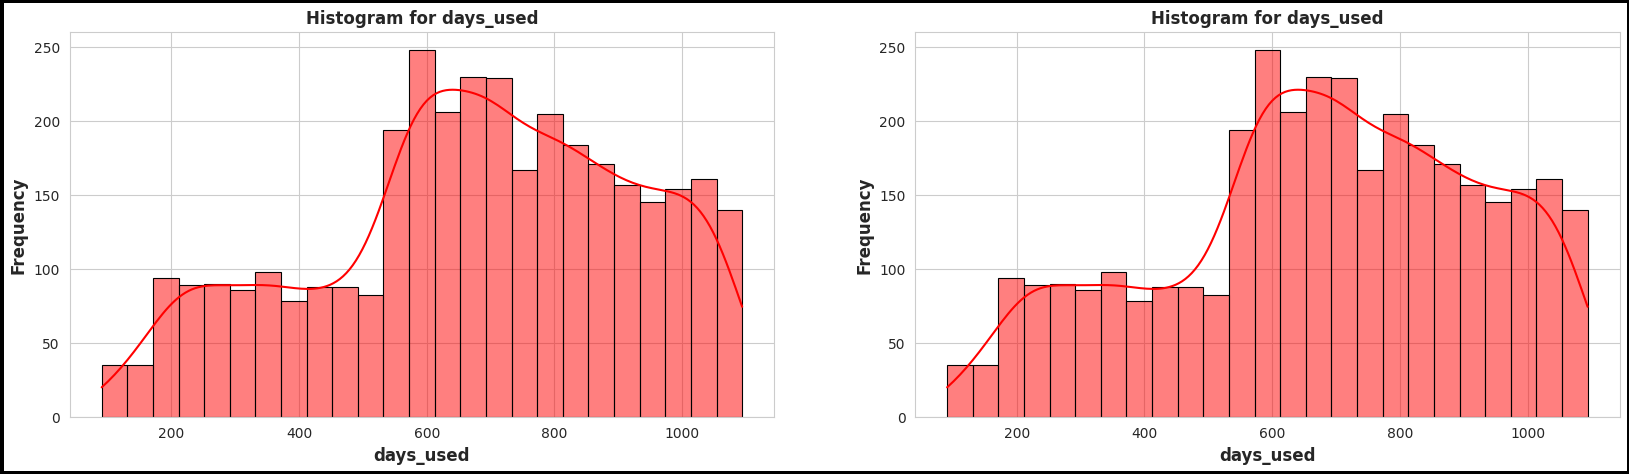

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                      normalized_used_price                                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


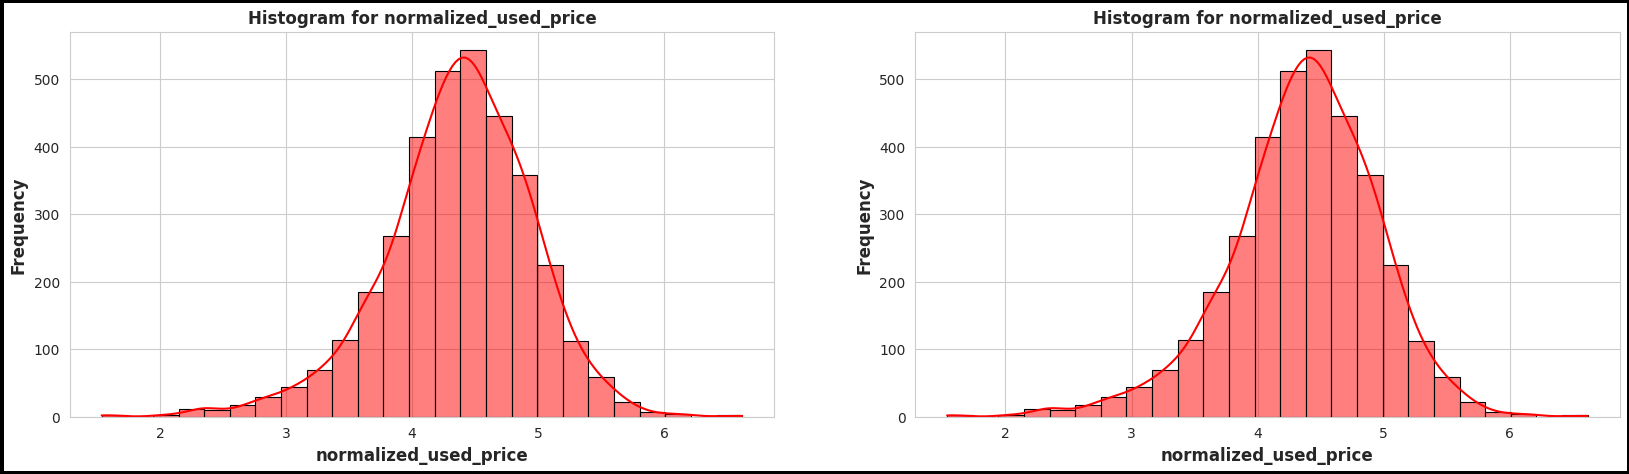

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                       normalized_new_price                                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


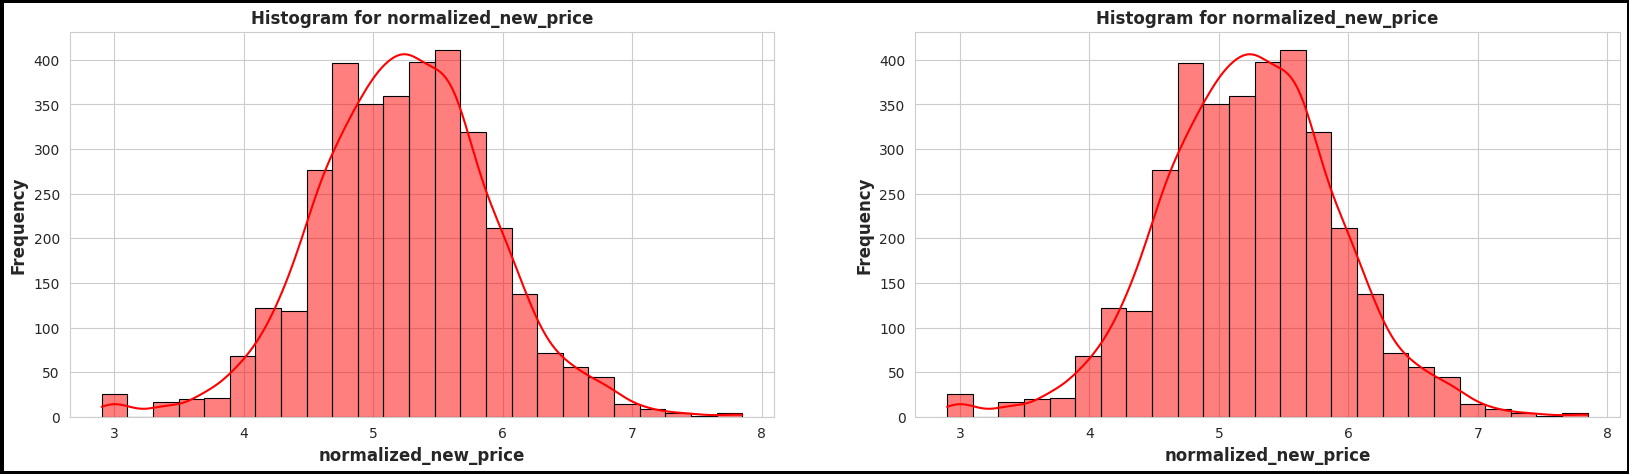

In [ ]:
# Check to see how replacing missing values changed the data
# Put a side-by-side comparison here of
# df_cont and df_median fill_cont ###

# data frame with missing values
df_old = df.drop(['release_year',
                  'brand_name',
                  'os',
                  '4g',
                  '5g'
                  ], axis=1
                 )

# data frame replacing missing values
df_median_fill_cont = df_median_fill.drop(['release_year',
                                           'brand_name',
                                           'os',
                                           '4g',
                                           '5g'
                                           ], axis=1
                                          )

# For all columns plot a histogram from the old and new data
for i in df_median_fill_cont.columns:

  # Figure template
  plt.figure(figsize=(20, 5),
             edgecolor = 'black',
             linewidth = 5
             )

  # Text separator
  print("-" * 193)
  txt = i
  print(txt.center(193))
  print("-" * 193)

  # Original data frame
  plt.subplot(1, 2, 1)
  ax1 = sns.histplot(df_old[i],
                     color=[1,0,0],
                     bins = 25,
                     edgecolor = 'black',
                     linewidth = 0.8,
                     kde=True
                     )

  # Figure details
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.title('Histogram for ' + i, fontsize=12, fontweight='bold')
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.ylabel('Frequency', fontsize=12, fontweight='bold')

  # New data frame
  plt.subplot(1, 2, 2)
  ax2 = sns.histplot(df_median_fill_cont[i],
                     color=[1,0,0],
                     bins = 25,
                     edgecolor = 'black',
                     linewidth = 0.8,
                     kde=True
                     )

  # Figure details
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.title('Histogram for ' + i, fontsize=12, fontweight='bold')
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel(i, fontsize=12, fontweight='bold')
  plt.ylabel('Frequency', fontsize=12, fontweight='bold')

  # Show plot
  plt.show()

# Data look relatively the same

* Observations: The data look relatively the same after replacing missing values.

## Model Building - Linear Regression

In [ ]:
# Fit linear model to data
olsmodel = sm.OLS(y_train, X_train)
olsres = olsmodel.fit()

print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           14:30:13   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
# Automating model checks with a function
# This function prints out the R2, Adj-R2, RSME, and MAE for
# train and test

def model_checker(model, X_train, y_train, X_test, y_test):
  # Print out adjusted R-squared

  #### --- Training ---
  print("-" * 50)
  print("Model performance on training data:")
  # Create dataframe with actual, fitted, and residual values
  df_train_pred = pd.DataFrame()

  df_train_pred["Actual Values"] = y_train.values.flatten()
  df_train_pred["Fitted Values"] = olsres.fittedvalues.values
  df_train_pred["Residuals"] = olsres.resid.values

  # R-squared and adjusted R-squared
  r2_train = r2_score(y_train, olsres.fittedvalues.values)
  print("R-squared:", round(r2_train,2))
  print("Adjusted R-squared:", round(olsres.rsquared_adj,2))

  # Print out RMSE for training data
  rmse1 = np.sqrt(mean_squared_error(y_train, df_train_pred["Fitted Values"]))
  print("RMSE for training data:", round(rmse1,2))
  print("MAE for training data", round(mean_absolute_error(y_train, df_train_pred["Fitted Values"]),4))

  ### --- Testing ---
  print("-" * 50)
  print("Model performance on testing data:")
  y_pred = olsres.predict(X_test)

  df_testing_pred = pd.DataFrame()

  # Print out R-sqaured and RMSE for test data
  r2_test = r2_score(y_test, y_pred)
  print("R-squared:", round(r2_test,2))
  print("Adjusted R-squared:", round(olsres.rsquared_adj,2))
  rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
  print("RMSE for test data:", round(rmse2,2))
  print("MAE on the test data",round(mean_absolute_error(y_test, y_pred),4))
  print("-" * 50)
  return df_train_pred, df_testing_pred, y_pred, y_test

In [ ]:
# Check model performance for initial model
df_train_pred, df_testing_pred, y_pred, y_test = model_checker(olsres, X_train, y_train, X_test, y_test)

--------------------------------------------------
Model performance on training data:
R-squared: 0.84
Adjusted R-squared: 0.84
RMSE for training data: 0.23
MAE for training data 0.1803
--------------------------------------------------
Model performance on testing data:
R-squared: 0.84
Adjusted R-squared: 0.84
RMSE for test data: 0.24
MAE on the test data 0.1847
--------------------------------------------------


* Observations: The testing and training fits are both very good, explaining 84% of the data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Check for multicollinearity and correct if necessary.

In [ ]:
# Check the VIF of the predictors
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i
                               ) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

# List attributes with VIF over 5
print("-" * 100)
print("Attributes with VIF over 5: \n\n{}\n".format(vif_series1[vif_series1 > 5]))
print("-" * 100)

----------------------------------------------------------------------------------------------------
Attributes with VIF over 5: 

const                227.744
screen_size            7.677
weight                 6.397
brand_name_Apple      13.058
brand_name_Huawei      5.984
brand_name_Others      9.711
brand_name_Samsung     7.540
os_iOS                11.785
dtype: float64

----------------------------------------------------------------------------------------------------


*  Observations: Excluding the dummy-coded variables, only two variables have a VIF over 5: weight and screen size.

In [ ]:
# Drop screen_size and check adj-R-squared
# We will ignore the dummy coded variables, such as brand name
vif_check = vif_series1[['screen_size','weight']]

while vif_check[vif_check > 5].any() > 0:
  print("Let's drop", vif_check[vif_check > 5].idxmax(), "as it has the highest VIF:", round(vif_check[vif_check > 5].max(),2))
  X_train = X_train.drop(vif_check[vif_check > 5].idxmax(), axis=1)

  olsmodel = sm.OLS(y_train, X_train)
  olsres = olsmodel.fit()

  # Rerun VIF for new version
  vif_series1 = pd.Series(
      [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
      index=X_train.columns,
  )

  vif_check = vif_series1[(vif_series1 > 5) & (vif_series1.index == 'screen_size') | (vif_series1.index == 'weight')]
#vif_series1 = vif_series1.drop(['screen_size','weight'])

Let's drop screen_size as it has the highest VIF: 7.68


In [ ]:
# Isolate label-coded variables
vif_series_dc = vif_series1.index.astype(str).str.contains("brand_") | \
                vif_series1.index.astype(str).str.contains("os_")
vif_series_lc = vif_series1[vif_series_dc == False]

In [ ]:
# Check that all VIFs are below 5
print("-" * 100)
print("VIF for label-coded predictors:")
print("-" * 100)
print(vif_series_lc)

numb_vif_5 = len(vif_series_lc[(vif_series_lc > 5) & (vif_series_lc.index != 'const')])

print("-" * 100)
print("Number of predictors with VIFs over 5 (not counting const):", numb_vif_5)

----------------------------------------------------------------------------------------------------
VIF for label-coded predictors:
----------------------------------------------------------------------------------------------------
const                  202.674
main_camera_mp           2.282
selfie_camera_mp         2.809
int_memory               1.362
ram                      2.282
battery                  3.843
weight                   2.994
release_year             4.730
days_used                2.649
normalized_new_price     3.078
4g_yes                   2.467
5g_yes                   1.810
dtype: float64
----------------------------------------------------------------------------------------------------
Number of predictors with VIFs over 5 (not counting const): 0


* Observations: All continuous variables have VIFs below 5.

### Drop predictors with p-values over 0.05

In [ ]:
# Automate attribute dropping with a function
# This function will drop the attribute with the highest p-value
# and recalculate all p-values until all p-values are under 0.05.

def drop_insig(model, res, X_train, y_train, X_test, y_test):

  # Identify attributes with p-values over 0.05
  length_p = len(res.pvalues[res.pvalues > 0.05])

  if length_p > 0:

    # Largest p-value...
    max_p_col = res.pvalues[res.pvalues > 0.05].idxmax()
    print("Largest p-value: ",max_p_col, ": ",
          round(res.pvalues[res.pvalues > 0.05].max(),4), sep=" ")

    # Drop attribute with largest p-value and refit
    X_train_up = X_train.drop([max_p_col], axis=1)
    olsmodel_up = sm.OLS(y_train, X_train_up)
    olsres_up = olsmodel_up.fit()

    # Check model performance
    return olsmodel_up, olsres_up, X_train_up
  else:
    print("No attributes with p-values over 0.05")
    print("-" * 100)
    olsres_up = res
    X_train_up = X_train
    olsmodel_up = model
    return olsmodel_up, olsres_up, X_train_up

In [ ]:
# Drop attributes with the highest p-value until they are all under 0.05
print("-" * 100)
print("Dropping attributes with p-values over 0.05")
print("-" * 100)
cnt = 1
while len(olsres.pvalues[olsres.pvalues > 0.05]) > 0:
  print("Iteration", cnt, end= " ")
  cnt += 1
  olsmodel, olsres, X_train =  drop_insig(olsmodel, olsres, X_train, y_train, X_test, y_test)

print("-" * 100)

----------------------------------------------------------------------------------------------------
Dropping attributes with p-values over 0.05
----------------------------------------------------------------------------------------------------
Iteration 1 Largest p-value:  brand_name_Oppo :  0.9905
Iteration 2 Largest p-value:  brand_name_Asus :  0.9591
Iteration 3 Largest p-value:  brand_name_Coolpad :  0.8326
Iteration 4 Largest p-value:  brand_name_XOLO :  0.8106
Iteration 5 Largest p-value:  brand_name_Realme :  0.8018
Iteration 6 Largest p-value:  brand_name_Gionee :  0.7905
Iteration 7 Largest p-value:  os_Windows :  0.6976
Iteration 8 Largest p-value:  brand_name_Apple :  0.6744
Iteration 9 Largest p-value:  brand_name_Alcatel :  0.6754
Iteration 10 Largest p-value:  brand_name_Lava :  0.7019
Iteration 11 Largest p-value:  battery :  0.5574
Iteration 12 Largest p-value:  brand_name_Microsoft :  0.4307
Iteration 13 Largest p-value:  brand_name_Honor :  0.3969
Iteration 14 Large

### Check the assumption of linearity and independence between predictors and target variable

In [ ]:
# Create a dataframe with actual, fitted and residual values for the updated model
df_train_pred = pd.DataFrame()

df_train_pred["Actual Values"] = y_train  # actual values
df_train_pred["Fitted Values"] = olsres.fittedvalues  # predicted values
df_train_pred["Residuals"] = olsres.resid  # residuals

df_train_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087,3.867,0.220
1525,4.448,4.602,-0.154
1128,4.315,4.287,0.028
3003,4.282,4.195,0.087
2907,4.456,4.491,-0.034


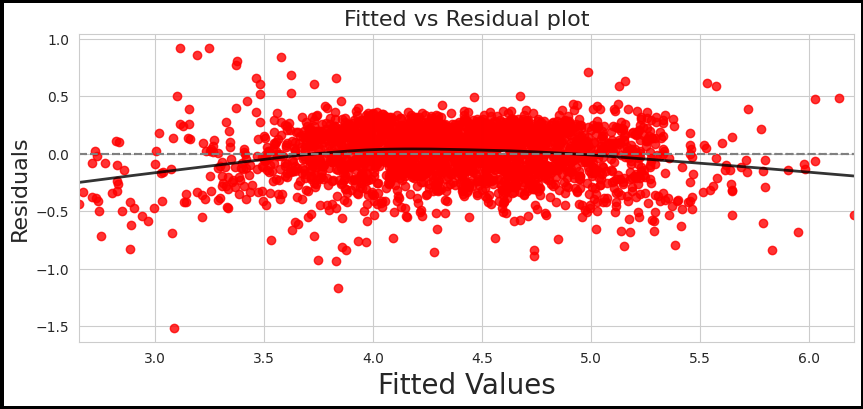

In [ ]:
# plotting the fitted values vs residuals

plt.figure(figsize=(10, 4), edgecolor = 'black', linewidth = 5)
sns.residplot(data=df_train_pred,
              x="Fitted Values",
              y="Residuals",
              color="red",
              lowess=True,
              line_kws={'color': 'black', 'lw': 2, 'alpha': 0.8}
              )

plt.axhline(y=0, color='gray', linestyle = '--')
plt.xlabel("Fitted Values", fontsize = 20)
plt.ylabel("Residuals", fontsize = 16)
plt.title("Fitted vs Residual plot", fontsize = 16)
plt.show()

* Observations: There does not appear to be a violation of the independence assumption in the data.

### Check the assumption that the residuals are normally distributed

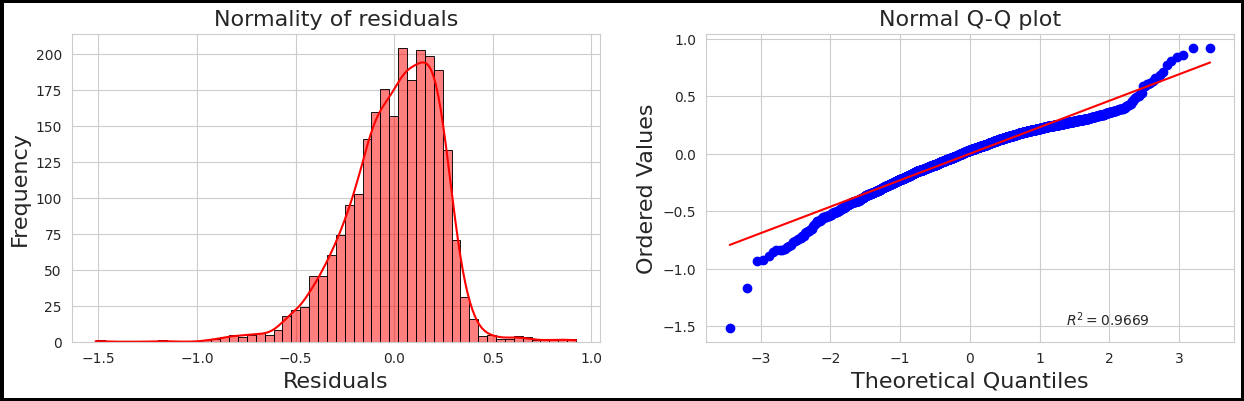

In [ ]:
# Checking normality assumption
plt.figure(figsize=(15, 4), edgecolor = 'black', linewidth = 5)

plt.subplot(1, 2, 1)
sns.histplot(data=df_train_pred,
             x='Residuals',
             color = 'red',
             kde=True,
             edgecolor = 'black'
             )

plt.title("Normality of residuals", fontsize = 16)
plt.xlabel("Residuals", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)

plt.subplot(1,2,2)
sns.set_style("darkgrid")
stats.probplot(df_train_pred['Residuals'],
               dist="norm",
               plot=pylab,
               rvalue=True
               )

plt.ylabel("Ordered Values", fontsize = 16),
plt.xlabel("Theoretical Quantiles", fontsize = 16)
plt.title("Normal Q-Q plot", fontsize = 16)
plt.show()


* Observations: Distribution is left-skewed and appears to violate normality at the tails.

In [ ]:
# Test the hypothesis that the residuals are normally distributed
normality_stat, normality_p = stats.shapiro(df_train_pred['Residuals'])
print("Normality test statistic:", normality_stat)
print("Normality test p-value:", normality_p)

if normality_p < 0.05:
  print("Reject the null hypothesis that the residuals are normally distributed.")
else:
  print("Fail to reject the null hypothesis that the residuals are not normally distributed.")

Normality test statistic: 0.9676950829900596
Normality test p-value: 6.983856712626295e-23
Reject the null hypothesis that the residuals are normally distributed.


* Observations: The residuals are not normally distributed, but as an approximation, I am willing to accept this distribution as close to being normal.

### Check the assumption that the residuals are homoscedastic

In [ ]:
# Use goldfeld quandt test to homoscedasticity assumption
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_train_pred["Residuals"], X_train) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

if test[1] < 0.05:
  print("Reject the null hypothesis that the residuals are homoscedastic: p-value =", round(test[1], 2))
else:
  print("Fail to reject the null hypothesis that the residuals are homoscedastic: p-value =", round(test[1], 2))

Fail to reject the null hypothesis that the residuals are homoscedastic: p-value = 0.44


* Observations: Because the Goldfeld quandt test did not yield significance, it is unlikely that outliers negatively affected the interpretability of the model.

## Final Model

In [ ]:
# Fit final model
olsmodel_final_model = sm.OLS(y_train,X_train)
olsres_final = olsmodel_final_model.fit()
print(olsres_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           14:30:16   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### How well does the model predict data it hasn't been exposed to?

In [ ]:
# dropping columns from the test data that were removed due
# to multicollinearity or high p-values

X_test2 = X_test[['const',
                  'main_camera_mp',
                  'selfie_camera_mp',
                  'ram',
                  'weight',
                  'release_year',
                  'normalized_new_price',
                  'brand_name_Samsung',
                  'brand_name_Karbonn',
                  'brand_name_Lenovo',
                  'brand_name_Xiaomi',
                  'os_iOS',
                  'os_Others',
                  '4g_yes',
                  '5g_yes']
                ]

In [ ]:
# checking model performance on training (70% ) and testing (30% ) data.
df_train_pred2, df_testing_pred2, y_pred2, y_test2 = model_checker(olsres_final, X_train, y_train, X_test2, y_test)

--------------------------------------------------
Model performance on training data:
R-squared: 0.84
Adjusted R-squared: 0.84
RMSE for training data: 0.23
MAE for training data 0.1828
--------------------------------------------------
Model performance on testing data:
R-squared: 0.84
Adjusted R-squared: 0.84
RMSE for test data: 0.24
MAE on the test data 0.187
--------------------------------------------------


* Observations: Model performance remains high for training and testing at 84% explained variance.

### Print out the final model equation

In [ ]:
# Print out the model
Equation = "Normalized used price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres.params.iloc[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres.params.iloc[i],
            "* (",
            X_train.columns[i],
            ")",
            "\n+",
            end="  ",
        )
    else:
        print(olsres.params.iloc[i], "* (", X_train.columns[i], ")")

Normalized used price = 1.4999812451972647 + 0.020967228790752804 * ( main_camera_mp ) 
+  0.013827288876828938 * ( selfie_camera_mp ) 
+  0.020712701657147135 * ( ram ) 
+  0.0016616476692228141 * ( weight ) 
+  -0.02916976367153888 * ( release_year ) 
+  0.44147230022363704 * ( normalized_new_price ) 
+  0.11559844506476435 * ( brand_name_Karbonn ) 
+  -0.03742329934072815 * ( brand_name_Samsung ) 
+  -0.06699285130111571 * ( brand_name_Sony ) 
+  0.08006840695804246 * ( brand_name_Xiaomi ) 
+  -0.12757512561898107 * ( os_Others ) 
+  -0.09000552317648956 * ( os_iOS ) 
+  0.05021345152978295 * ( 4g_yes ) 
+  -0.06725868426972163 * ( 5g_yes )


### Plot training fit scatter plot

------------------------------------  Training data  ------------------------------------


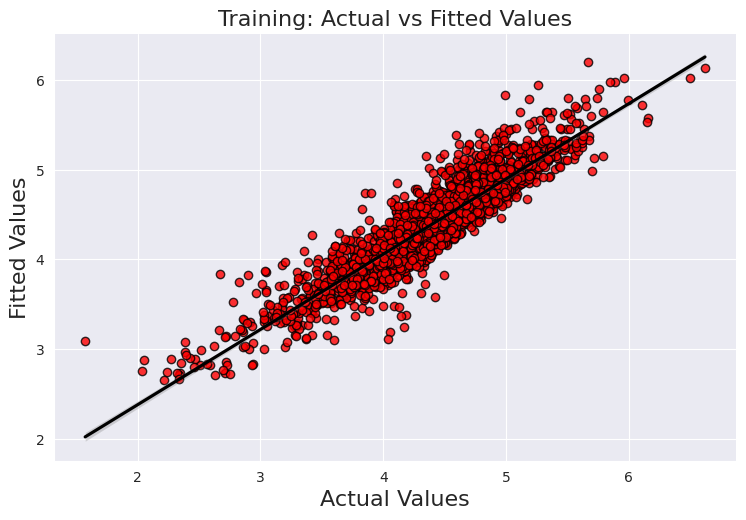

In [ ]:
### Make a scatter plot showing the relationship between
###the actual and fitted values for training

## Training
print("-" * 36, " Training data ", "-" * 36)
sns.lmplot(data=df_train_pred,
           x='Actual Values',
           y='Fitted Values',
           fit_reg=True,
           height=5,
           aspect=1.5,
           scatter_kws={"color": "red",'edgecolor':'black'},
           line_kws={"color": "black"}
           )

# Figure details
plt.title("Training: Actual vs Fitted Values", fontsize = 16)
plt.xlabel("Actual Values", fontsize = 16)
plt.ylabel("Fitted Values", fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

### Plot testing fit scatter plot

In [ ]:
# Create dataframe with test data
test_data = pd.DataFrame()
test_data['Actual Values'] = y_test.reset_index(drop=True)
test_data['Fitted Values'] = y_pred.reset_index(drop=True)

------------------------------------  Testing data  ------------------------------------


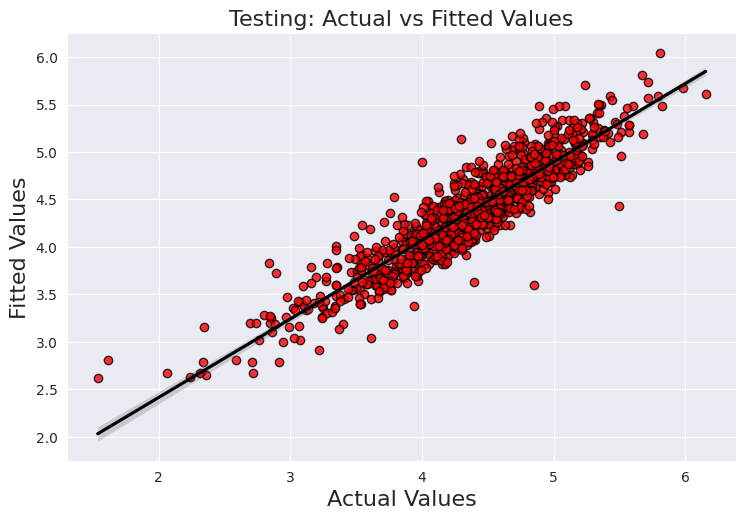

In [ ]:
### Make a scatter plot showing the relationship between
###the actual and fitted values for testing data

## Testing
print("-" * 36, " Testing data ", "-" * 36)
sns.lmplot(data = test_data,
           x='Actual Values',
           y='Fitted Values',
           fit_reg=True,
           height=5,
           aspect=1.5,
           scatter_kws={"color": "red",'edgecolor':'black'},
           line_kws={"color": "black"}
           )

# Figure details
plt.title("Testing: Actual vs Fitted Values", fontsize = 16)
plt.xlabel("Actual Values", fontsize = 16)
plt.ylabel("Fitted Values", fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

### Using this final model we can predict the resale value of a device by indicating its:
1. main_camera_mp
2. selfie_camera_mp
3. ram
4. weight
5. release year (years since 2021)
6. normalized new price
7. brand name
8. operating system
9. 4g availability
10. 5g availability

In [ ]:
# Create a small program to predict the resale price

col_names = X_test2.columns.tolist()
col_names.remove('const')
X_test2_pred = X_test2.drop('const', axis = 1)

predictors = []
for i in col_names:
  if (X_test2_pred[i].dtypes == 'int64') & (i != 'release_year'):
    print("Input device attribute:", i, '(0 or 1):', end = ' ')
    x = input()
  elif i == 'release_year':
    print("Input device attribute:", i, '(Years since 2021):', end = ' ')
    x = input()
  else:
    print("Input device", i,":", end = ' ' )
    x = input()
  x_float = float(x)
  predictors.append(x_float)

NUP = (1.4999812451972647 + 0.020967228790752804 * ( predictors[0] )
+  0.013827288876828938 * ( predictors[1] )
+  0.020712701657147135 * ( predictors[2] )
+  0.0016616476692228141 * ( predictors[3] )
+  -0.02916976367153888 * ( predictors[4] )
+  0.44147230022363704 * ( predictors[5] )
+  0.11559844506476435 * ( predictors[6] )
+  -0.03742329934072815 * ( predictors[7] )
+  -0.06699285130111571 * ( predictors[8] )
+  0.08006840695804246 * ( predictors[9] )
+  -0.12757512561898107 * ( predictors[10] )
+  -0.09000552317648956 * ( predictors[11] )
+  0.05021345152978295 * ( predictors[12] )
+  -0.06725868426972163 * ( predictors[13] ))

print("-" * 50)
print("The predicted normalized used price is:", round(NUP,2))
print("-" * 50)

# Example
# Brand Name = Honor
# os = Android
# 4g = 1
# 5g = 0
# main camera mp = 13
# selfie camera mp = 16
# ram = 6
# weight = 165
# release year = 2020 (1)
# normalized new price = 4.8860542

Input device main_camera_mp : 13
Input device selfie_camera_mp : 16
Input device ram : 6
Input device weight : 165
Input device attribute: release_year (Years since 2021): 1
Input device normalized_new_price : 4.8860542
Input device attribute: brand_name_Samsung (0 or 1): 0
Input device attribute: brand_name_Karbonn (0 or 1): 0
Input device attribute: brand_name_Lenovo (0 or 1): 0
Input device attribute: brand_name_Xiaomi (0 or 1): 0
Input device attribute: os_iOS (0 or 1): 0
Input device attribute: os_Others (0 or 1): 0
Input device attribute: 4g_yes (0 or 1): 1
Input device attribute: 5g_yes (0 or 1): 0
--------------------------------------------------
The predicted normalized used price is: 4.57
--------------------------------------------------


## Actionable Insights and Recommendations

### After correcting for multicollinearity and removing non-significant factors, there are several variables that are strong predictors of normalized used price:

1. Megapixels of the main camera
2. Megapixels of the selfie camera
3. Amount of ram
4. Weight of the device
5. Release year
6. The price of the same device purchased as new.
7. Whether the brand name is Karbonn.
8. Whether the brand name is Lenovo
9. Whether the brand name is Xiaomi
10. Whether the operating system is other than Android, Windows, or iOS (negative correlation)
11. Whether the device has 4g capability
12. Whether the device has 5g capability (negative correlation)




___

### Summary


In general, the predicted used price of a device will be maximized with greater camera resolution, storage capability, and weight.

The best predictors of device value are how much it sells for new (coef = 0.435), whether it is sold by Karbonn (coef = 0.121) or Xiaomi (coef = 0.088), and that it has an Android, Windows, or iOS operating system.

### Insight

Predicting the sales price of a used device is critical for ReCell. In order to maximize profit, ReCell must invest in the devices with the highest resale value. Here, I built a linear model that identified the strongest predictors of resale price and can be used to predict resale value. Based on this model, here are my recommendations:

* Given that the sample is almost entirely made of Android devices and they tend to go for higher prices, ReCell should invest heavily in acquiring Android devices.
* Since devices with higher new prices are also sold more used, ReCell should invest in the more expensive Android devices.
* Devices with 5g capability aren't as profitable as those with 4g capability. ReCell should invest in 4g devices.
* The devices sold by Karbonn and Xiaomi have great resale value, so looking up the original seller is a good idea before investing in a stock of used devices.